<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_Phase5_ANN(new_data_2023_07_01)_6_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

cv = LeaveOneOut()

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/8.Colab Notebooks/2023.07.01 Final/

Mounted at /content/drive
/content/drive/My Drive/8.Colab Notebooks/2023.07.01 Final


In [3]:
import os
directory = 'path'
for filename in os.listdir(directory):
    # Check if the file has a .txt extension
    if filename.endswith('.txt'):
        # Print the file name
        print(filename)

AAO_msl_Reanalysis.txt
AMO_Reanalysis.txt
AO_msl_Reanalysis.txt
EMI_Reanalysis.txt
GMT_Reanalysis.txt
NINO3_Reanalysis.txt
NINO4_Reanalysis.txt
NINO34_Reanalysis.txt
PDO_Reanalysis.txt
PNA_Reanalysis.txt
QBO_Reanalysis.txt


In [12]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory = 'path'

df_list = []

# Loop through all files in the directory
for filename in os.listdir(directory):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data = []
      for line in lines:
          year = int(line[0])
          values = [float(x) for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data.append(row_dict)
    # create the DataFrame
      df = pd.DataFrame(data)
      df = df.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df = df.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      # df[column_name] = scaler.fit_transform(df[column_name].values.reshape(-1, 1))
      df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
rawdata_df = pd.concat(df_list, ignore_index=True)

# Group by year and month and aggregate values
rawdata_df = rawdata_df.groupby(['year', 'month']).mean().reset_index()

# Fill missing values with 0 if needed
# rawdata_df = rawdata_df.fillna(0)

rawdata_df

year  month  AAO_msl_Reanalysis  NINO3_Reanalysis  GMT_Reanalysis  \
0     1854      1                 NaN             0.065             NaN   
1     1854      2                 NaN            -0.033             NaN   
2     1854      3                 NaN            -0.086             NaN   
3     1854      4                 NaN             0.074             NaN   
4     1854      5                 NaN             0.210             NaN   
...    ...    ...                 ...               ...             ...   
2011  2021      8              -0.266            -0.616           1.669   
2012  2021      9              -1.470            -0.651           1.933   
2013  2021     10              -0.038            -0.988           2.071   
2014  2021     11              -1.382            -1.338           1.917   
2015  2021     12              -2.403            -1.754           1.691   

      EMI_Reanalysis  AO_msl_Reanalysis  AMO_Reanalysis  PDO_Reanalysis  \
0             -0.316                NaN           1.558           0.107   
1              0.540                NaN           2.254           0.062   
2              0.979                NaN           1.649           0.235   
3              0.932                NaN           1.193           0.156   
4              0.584                NaN           0.235          -0.220   
...              ...                ...             ...             ...   
2011          -0.524              0.104           0.843          -0.385   
2012          -0.654             -0.613           1.449          -1.249   
2013          -0.840             -0.527           1.663          -2.306   
2014          -0.670             -0.066           1.680          -2.050   
2015          -0.197             -0.339           1.255          -2.065   

      NINO34_Reanalysis  NINO4_Reanalysis  QBO_Reanalysis  PNA_Reanalysis  
0                -0.436            -0.393             NaN             NaN  
1                -0.442             0.003             NaN             NaN  
2                 0.017             0.412             NaN             NaN  
3                 0.354             0.471             NaN             NaN  
4                 0.479             0.681             NaN             NaN  
...                 ...               ...             ...             ...  
2011             -0.632            -0.268          -0.620          -0.081  
2012             -0.703            -0.784          -0.828          -0.040  
2013             -1.080            -1.074          -1.028          -0.393  
2014             -1.161            -1.082          -1.168           0.852  
2015             -1.442            -1.330          -1.322          -3.212  

[2016 rows x 13 columns]

In [13]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory2 = 'country'

df2_list = []

# Loop through all files in the directory2
for filename in os.listdir(directory2):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory2, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data2 = []
      for line in lines:
          year = int(line[0])
          values = [float(x) if x != '-9' else 0 for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data2.append(row_dict)
    # create the DataFrame
      df2 = pd.DataFrame(data2)
      df2 = df2.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df2 = df2.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      #df2[column_name] = scaler.fit_transform(df2[column_name].values.reshape(-1, 1))
      df2_list.append(df2)

# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(df2_list, ignore_index=True)

# Group by year and month and aggregate values
result_df = result_df.groupby(['year', 'month']).mean().reset_index()

result_df = result_df.rename(columns={'Mexico_TC_freq_NHC-ENP': 'Mexic2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'Mexico_TC_landfall_intensity_NHC-ENP': 'Mexic2_TC_landfall_intensity_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_freq_NHC-ENP': 'U2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_landfall_intensity_NHC-ENP': 'U2_TC_landfall_intensity_NHC-ENP'})
result_df.columns = map(str.lower, result_df.columns)
# Fill missing values with 0 if neederesult# merged_df2 = merged_df2.fillna(0)
pd.options.display.max_columns = None
result_df

year  month  korea_tc_freq_jtwc-wnp  japan_tc_freq_jtwc-wnp  \
0    1959      1                     0.0                     0.0   
1    1959      2                     0.0                     0.0   
2    1959      3                     0.0                     0.0   
3    1959      4                     0.0                     0.0   
4    1959      5                     0.0                     0.0   
..    ...    ...                     ...                     ...   
751  2021      8                     1.0                     4.0   
752  2021      9                     1.0                     1.0   
753  2021     10                     0.0                     1.0   
754  2021     11                     0.0                     0.0   
755  2021     12                     0.0                     0.0   

     korea_tc_landfall_intensity_jtwc-wnp  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
..                                    ...   
751                                  26.0   
752                                  55.0   
753                                   0.0   
754                                   0.0   
755                                   0.0   

     japan_tc_landfall_intensity_jtwc-wnp  taiwan_tc_freq_jtwc-wnp  \
0                                     0.0                      0.0   
1                                     0.0                      0.0   
2                                     0.0                      0.0   
3                                     0.0                      0.0   
4                                     0.0                      0.0   
..                                    ...                      ...   
751                                  32.0                      1.0   
752                                  42.0                      1.0   
753                                  78.0                      0.0   
754                                   0.0                      0.0   
755                                   0.0                      0.0   

     taiwan_tc_landfall_intensity_jtwc-wnp  china_tc_freq_jtwc-wnp  \
0                                      0.0                     0.0   
1                                      0.0                     0.0   
2                                      0.0                     0.0   
3                                      0.0                     0.0   
4                                      0.0                     0.0   
..                                     ...                     ...   
751                                   45.0                     1.0   
752                                  148.0                     1.0   
753                                    0.0                     2.0   
754                                    0.0                     0.0   
755                                    0.0                     1.0   

     china_tc_landfall_intensity_jtwc-wnp  vietnam_tc_freq_jtwc-wnp  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   
..                                    ...                       ...   
751                                  24.0                       0.0   
752                                 105.0                       2.0   
753                                  42.0                       2.0   
754                                   0.0                       0.0   
755                                  63.0                       1.0   

     vietnam_tc_landfall_intensity_jtwc-wnp  phili_tc_freq_jtwc-wnp  \
0                                       0

In [14]:
column_titles = list(result_df.columns)
column_titles.remove('year')
column_titles.remove('month')
column_titles.sort()
column_titles

['austrailia_tc_freq_jtwc-sh',
 'austrailia_tc_landfall_intensity_jtwc-sh',
 'bangla_tc_freq_jtwc-nio',
 'bangla_tc_landfall_intensity_jtwc-nio',
 'carribean_tc_freq_nhc-nat',
 'carribean_tc_landfall_intensity_nhc-nat',
 'china_tc_freq_jtwc-wnp',
 'china_tc_landfall_intensity_jtwc-wnp',
 'india_tc_freq_jtwc-nio',
 'india_tc_landfall_intensity_jtwc-nio',
 'japan_tc_freq_jtwc-wnp',
 'japan_tc_landfall_intensity_jtwc-wnp',
 'korea_tc_freq_jtwc-wnp',
 'korea_tc_landfall_intensity_jtwc-wnp',
 'madagascar_tc_freq_jtwc-sh',
 'madagascar_tc_landfall_intensity_jtwc-sh',
 'mexic2_tc_freq_nhc-enp',
 'mexic2_tc_landfall_intensity_nhc-enp',
 'mexico_tc_freq_nhc-nat',
 'mexico_tc_landfall_intensity_nhc-nat',
 'myanmar_tc_freq_jtwc-nio',
 'myanmar_tc_landfall_intensity_jtwc-nio',
 'pakistan_tc_freq_jtwc-nio',
 'pakistan_tc_landfall_intensity_jtwc-nio',
 'phili_tc_freq_jtwc-wnp',
 'phili_tc_landfall_intensity_jtwc-wnp',
 'sri_tc_freq_jtwc-nio',
 'sri_tc_landfall_intensity_jtwc-nio',
 'taiwan_tc_freq_j

In [15]:
country_codes = {
    'austrailia': 0,
    'bangla': 1,
    'carribean': 2,
    'china': 3,
    'india': 4,
    'japan': 5,
    'korea': 6,
    'madagascar': 7,
    'mexic2': 8,
    'mexico': 9,
    'myanmar': 10,
    'phili': 11,
    'pakistan': 12,
    'sri': 13,
    'taiwan': 14,
    'u2': 15,
    'us': 16,
    'vietnam': 17,
}


In [16]:
result_dfs = []

for col in column_titles:

    for key in country_codes.keys():
        if key in col.lower():
            country = country_codes[key]
            break
    else:
        country = None

    # Add the 'country' column to result_df
    result_df['country'] = country
    result_df['name'] = key

    # Check if the selected column name contains 'freq' or 'intensity', and replace the entire column name with either 'freq' or 'intensity' accordingly
    if 'freq' in col.lower():
        new_column_name = 'freq'
    elif 'intensity' in col.lower():
        new_column_name = 'intensity'
    else:
        new_column_name = col

    # Get the years without nan values for the selected country
    years = result_df[result_df[col].notna()]['year'].unique()

    # Filter dataframe A for the selected country and years
    x = rawdata_df[rawdata_df['year'].isin(years)]

    # Filter dataframe B for the selected country and years, and rename the selected column
    y = result_df[['year', 'month', 'country', 'name', col]][result_df[col].notna() & result_df['year'].isin(years)].rename(columns={col: new_column_name})

    xy = pd.merge(x, y, on=['year', 'month'])
    result_dfs.append(xy)

alldfs = pd.concat(result_dfs, ignore_index=True)
alldfs


# one-hot encoding using pandas.get_dummies() method
one_hot = pd.get_dummies(alldfs['country'])

# concatenate the one-hot encoded dataframe with the original dataframe
alldfs = pd.concat([alldfs, one_hot], axis=1)

# drop the original 'country' column
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('freq')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('intensity')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('country')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('name')))
alldfs = alldfs[cols]
alldfs

year  month  AAO_msl_Reanalysis  NINO3_Reanalysis  GMT_Reanalysis  \
0      1991      1              -1.248             0.103           0.333   
1      1991      2               0.846            -0.032           0.500   
2      1991      3              -0.501            -0.144          -0.041   
3      1991      4               0.514             0.096           0.378   
4      1991      5               0.018             0.422           0.132   
...     ...    ...                 ...               ...             ...   
24235  2021      8              -0.266            -0.616           1.669   
24236  2021      9              -1.470            -0.651           1.933   
24237  2021     10              -0.038            -0.988           2.071   
24238  2021     11              -1.382            -1.338           1.917   
24239  2021     12              -2.403            -1.754           1.691   

       EMI_Reanalysis  AO_msl_Reanalysis  AMO_Reanalysis  PDO_Reanalysis  \
0               2.040              0.695          -1.443          -1.199   
1               2.013             -0.229          -1.146          -0.586   
2               1.541             -0.239          -1.281          -0.451   
3               1.341              1.089          -1.933          -0.950   
4               1.419              0.526          -2.156          -0.984   
...               ...                ...             ...             ...   
24235          -0.524              0.104           0.843          -0.385   
24236          -0.654             -0.613           1.449          -1.249   
24237          -0.840             -0.527           1.663          -2.306   
24238          -0.670             -0.066           1.680          -2.050   
24239          -0.197             -0.339           1.255          -2.065   

       NINO34_Reanalysis  NINO4_Reanalysis  QBO_Reanalysis  PNA_Reanalysis  0  \
0                  0.604             1.192           0.926          -0.477  1   
1                  0.453             1.147           0.950           0.891  1   
2                  0.155             0.825           0.838          -1.267  1   
3                  0.423             0.870           0.329           0.417  1   
4                  0.467             1.003          -0.296          -0.210  1   
...                  ...               ...             ...             ... ..   
24235             -0.632            -0.268          -0.620          -0.081  0   
24236             -0.703            -0.784          -0.828          -0.040  0   
24237             -1.080            -1.074          -1.028          -0.393  0   
24238             -1.161            -1.082          -1.168           0.852  0   
24239             -1.442            -1.330          -1.322          -3.212  0   

       1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  freq  \
0      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
1      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1.0   
2      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
3      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
4      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
...   .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..   ...   
24235  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   NaN   
24236  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   NaN   
24237  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   NaN   
24238  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   NaN   
24239  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   NaN   

       intensity  country        name  
0            NaN        0  austrailia  
1            NaN        0  austrailia  
2            NaN        0  austrailia  
3            NaN        0  austrailia  
4            NaN        0  austrailia  
...          ...      ...         ...  
24235        0.0       17     vietnam  

In [17]:
freqdf = alldfs.drop(columns=['intensity'])
freqdf = freqdf.dropna().reset_index(drop=True)
freqdf

year  month  AAO_msl_Reanalysis  NINO3_Reanalysis  GMT_Reanalysis  \
0      1991      1              -1.248             0.103           0.333   
1      1991      2               0.846            -0.032           0.500   
2      1991      3              -0.501            -0.144          -0.041   
3      1991      4               0.514             0.096           0.378   
4      1991      5               0.018             0.422           0.132   
...     ...    ...                 ...               ...             ...   
12115  2021      8              -0.266            -0.616           1.669   
12116  2021      9              -1.470            -0.651           1.933   
12117  2021     10              -0.038            -0.988           2.071   
12118  2021     11              -1.382            -1.338           1.917   
12119  2021     12              -2.403            -1.754           1.691   

       EMI_Reanalysis  AO_msl_Reanalysis  AMO_Reanalysis  PDO_Reanalysis  \
0               2.040              0.695          -1.443          -1.199   
1               2.013             -0.229          -1.146          -0.586   
2               1.541             -0.239          -1.281          -0.451   
3               1.341              1.089          -1.933          -0.950   
4               1.419              0.526          -2.156          -0.984   
...               ...                ...             ...             ...   
12115          -0.524              0.104           0.843          -0.385   
12116          -0.654             -0.613           1.449          -1.249   
12117          -0.840             -0.527           1.663          -2.306   
12118          -0.670             -0.066           1.680          -2.050   
12119          -0.197             -0.339           1.255          -2.065   

       NINO34_Reanalysis  NINO4_Reanalysis  QBO_Reanalysis  PNA_Reanalysis  0  \
0                  0.604             1.192           0.926          -0.477  1   
1                  0.453             1.147           0.950           0.891  1   
2                  0.155             0.825           0.838          -1.267  1   
3                  0.423             0.870           0.329           0.417  1   
4                  0.467             1.003          -0.296          -0.210  1   
...                  ...               ...             ...             ... ..   
12115             -0.632            -0.268          -0.620          -0.081  0   
12116             -0.703            -0.784          -0.828          -0.040  0   
12117             -1.080            -1.074          -1.028          -0.393  0   
12118             -1.161            -1.082          -1.168           0.852  0   
12119             -1.442            -1.330          -1.322          -3.212  0   

       1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  freq  \
0      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
1      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1.0   
2      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
3      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
4      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0.0   
...   .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..   ...   
12115  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   0.0   
12116  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   2.0   
12117  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   2.0   
12118  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   0.0   
12119  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   1.0   

       country        name  
0            0  austrailia  
1            0  austrailia  
2            0  austrailia  
3            0  austrailia  
4            0  austrailia  
...        ...         ...  
12115       17     vietnam  
12116       17     vietnam  
12117       17     vietnam  
12118       17     vietnam  


In [18]:
intendf = alldfs.drop(columns=['freq'])
intendf = intendf.dropna().reset_index(drop=True)
intendf

year  month  AAO_msl_Reanalysis  NINO3_Reanalysis  GMT_Reanalysis  \
0      1991      1              -1.248             0.103           0.333   
1      1991      2               0.846            -0.032           0.500   
2      1991      3              -0.501            -0.144          -0.041   
3      1991      4               0.514             0.096           0.378   
4      1991      5               0.018             0.422           0.132   
...     ...    ...                 ...               ...             ...   
12115  2021      8              -0.266            -0.616           1.669   
12116  2021      9              -1.470            -0.651           1.933   
12117  2021     10              -0.038            -0.988           2.071   
12118  2021     11              -1.382            -1.338           1.917   
12119  2021     12              -2.403            -1.754           1.691   

       EMI_Reanalysis  AO_msl_Reanalysis  AMO_Reanalysis  PDO_Reanalysis  \
0               2.040              0.695          -1.443          -1.199   
1               2.013             -0.229          -1.146          -0.586   
2               1.541             -0.239          -1.281          -0.451   
3               1.341              1.089          -1.933          -0.950   
4               1.419              0.526          -2.156          -0.984   
...               ...                ...             ...             ...   
12115          -0.524              0.104           0.843          -0.385   
12116          -0.654             -0.613           1.449          -1.249   
12117          -0.840             -0.527           1.663          -2.306   
12118          -0.670             -0.066           1.680          -2.050   
12119          -0.197             -0.339           1.255          -2.065   

       NINO34_Reanalysis  NINO4_Reanalysis  QBO_Reanalysis  PNA_Reanalysis  0  \
0                  0.604             1.192           0.926          -0.477  1   
1                  0.453             1.147           0.950           0.891  1   
2                  0.155             0.825           0.838          -1.267  1   
3                  0.423             0.870           0.329           0.417  1   
4                  0.467             1.003          -0.296          -0.210  1   
...                  ...               ...             ...             ... ..   
12115             -0.632            -0.268          -0.620          -0.081  0   
12116             -0.703            -0.784          -0.828          -0.040  0   
12117             -1.080            -1.074          -1.028          -0.393  0   
12118             -1.161            -1.082          -1.168           0.852  0   
12119             -1.442            -1.330          -1.322          -3.212  0   

       1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  intensity  \
0      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0        0.0   
1      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0       30.0   
2      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0        0.0   
3      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0        0.0   
4      0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0        0.0   
...   .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..        ...   
12115  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1        0.0   
12116  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1       36.0   
12117  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1       36.0   
12118  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1        0.0   
12119  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1      130.0   

       country        name  
0            0  austrailia  
1            0  austrailia  
2            0  austrailia  
3            0  austrailia  
4            0  austrailia  
...        ...         ...  
12115       17     vietnam  
12116       17     vietnam 

In [20]:
# ANN Leavoneyearout O
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model for predicting y1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=30, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="linear"))
model_1.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y1 and y2

y1_preds = []
y1_actuals = []
y1_test_country = []
y1_test_month = []
y1_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
# 3,5,6,15,16,11,14
freqdf = freqdf[~freqdf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)

#freqdf = freqdf[freqdf['country'] == 13].reset_index(drop=True)
#intendf = intendf[intendf['country'] == 13].reset_index(drop=True)

# Loop over each year and perform LOOCV
for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    freqdf_x1_train = freqdf[freqdf['year'] != year].iloc[:,1:31]
    freqdf_x1_test = freqdf[freqdf['year'] == year].iloc[:,1:31]
    freqdf_y1_train = freqdf[freqdf['year'] != year].iloc[:,[0, 1, 33, 31]]
    freqdf_y1_test = freqdf[freqdf['year'] == year].iloc[:,[0, 1, 33, 31]]

    # Train the model on the training set
    model_1.fit(freqdf_x1_train, freqdf_y1_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y1_pred = model_1.predict(freqdf_x1_test)

    # Add the predictions and actual values to the respective lists
    y1_preds.extend(y1_pred)
    y1_actuals.extend(freqdf_y1_test.iloc[:,3].values)
    y1_test_year.extend(freqdf_y1_test.iloc[:,0].values)
    y1_test_month.extend(freqdf_y1_test.iloc[:,1].values)
    y1_test_country.extend(freqdf_y1_test.iloc[:,2].values)


# Convert predictions to DataFrame and concatenate with country and month columns
y1_pred_df = pd.DataFrame({"year": y1_test_year, "month": y1_test_month, "country": y1_test_country, "y1_pred": np.squeeze(y1_preds),"y1_actual": y1_actuals})
y1_pred_df = y1_pred_df[['year', 'month', 'country', 'y1_pred', 'y1_actual']]

# Save predictions to CSV file
y1_pred_df.to_csv('y_pred_ANN_freq_20230701.csv', index=False)

import pickle

# 모델 저장
with open('model_freq_20230701.pkl', 'wb') as f:
    pickle.dump(model_1, f)

3/3 [==============================] - 0s 4ms/step


In [21]:
# ANN leaveoneyearout X

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model for predicting y1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=30, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="linear"))
model_1.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y1 and y2

y1_preds = []
y1_actuals = []
y1_test_country = []
y1_test_month = []
y1_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
freqdf = freqdf[~freqdf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Split the data into training and test sets
freqdf_x1_train = freqdf.iloc[:,1:31]
freqdf_x1_test = freqdf.iloc[:,1:31]
freqdf_y1_train = freqdf.iloc[:,[0, 1, 33, 31]]
freqdf_y1_test = freqdf.iloc[:,[0, 1, 33, 31]]

# Train the model on the entire training set
model_1.fit(freqdf_x1_train, freqdf_y1_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

# Predict the output for the test set
y1_pred = model_1.predict(freqdf_x1_test)

# Convert predictions to DataFrame and concatenate with country and month columns
y1_pred_df = pd.DataFrame({"year": freqdf_y1_test.iloc[:,0].values, "month": freqdf_y1_test.iloc[:,1].values, "country": freqdf_y1_test.iloc[:,2].values, "y1_pred": np.squeeze(y1_pred),"y1_actual": freqdf_y1_test.iloc[:,3].values})
y1_pred_df = y1_pred_df[['year', 'month', 'country', 'y1_pred', 'y1_actual']]

# Save predictions to CSV file
y1_pred_df.to_csv('y_pred_ANN_freq_20230701_F.csv', index=False)

import pickle

#Save
with open('model_freq_20230701_F.pkl', 'wb') as f:
    pickle.dump(model_1, f)


142/142 [==============================] - 0s 1ms/step


RMSE for y1: 1.5140468139103964
Correlation for y1: 0.8091487926861762


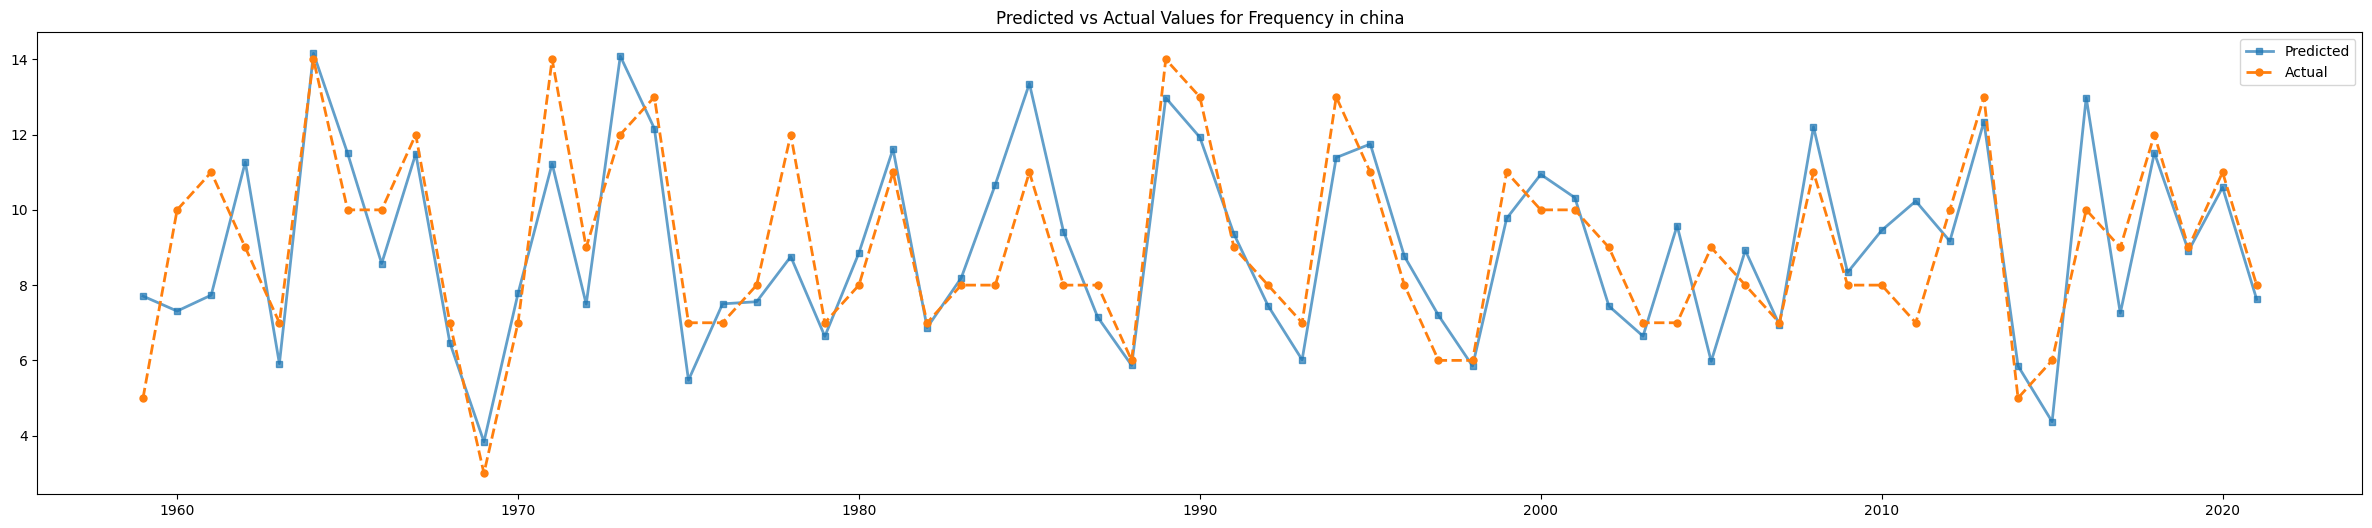

RMSE for y1: 1.4222778876325997
Correlation for y1: 0.8046975214340364


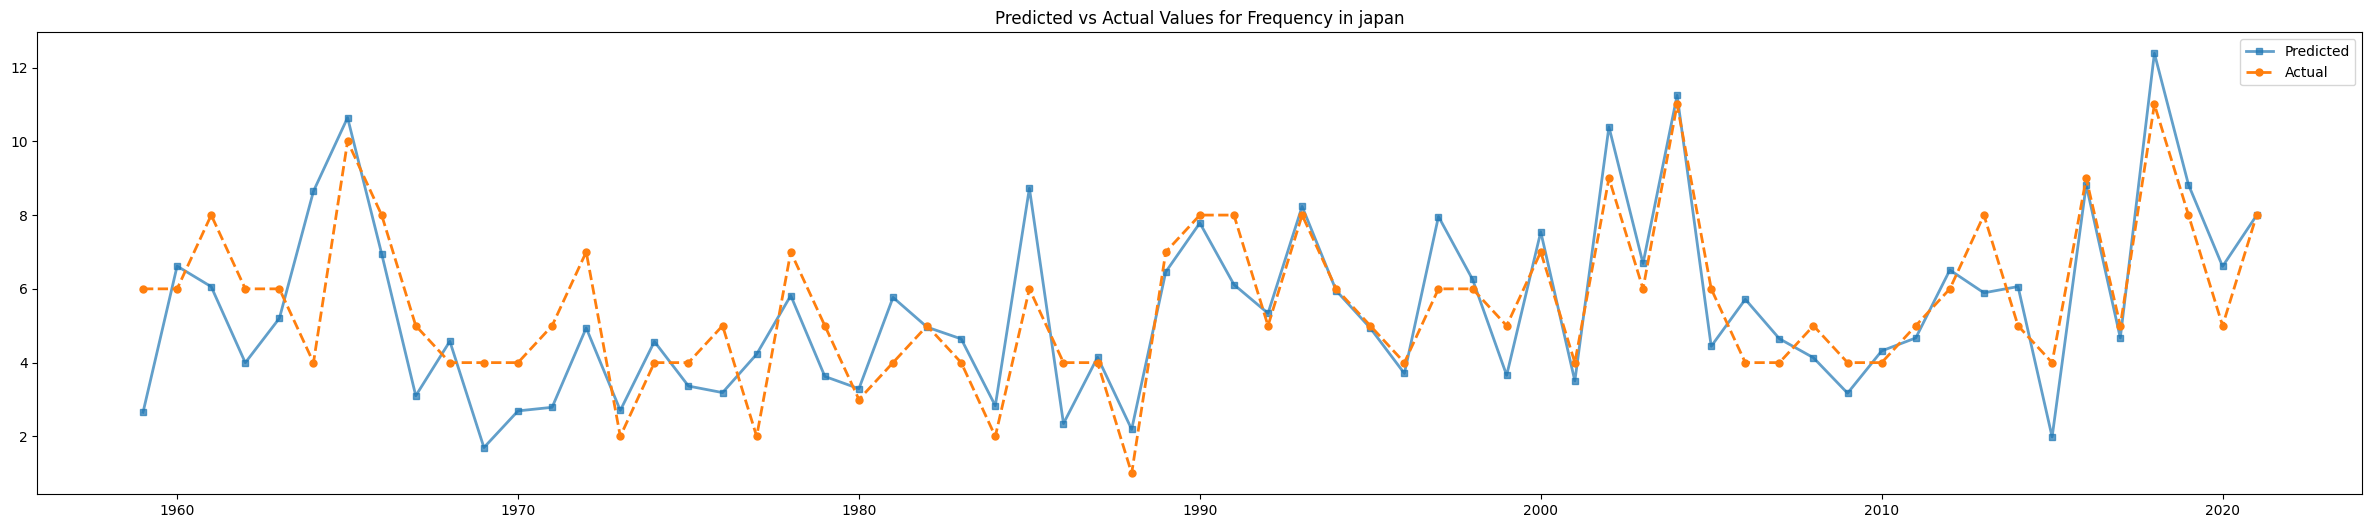

RMSE for y1: 1.104580465419461
Correlation for y1: 0.8308080948273514


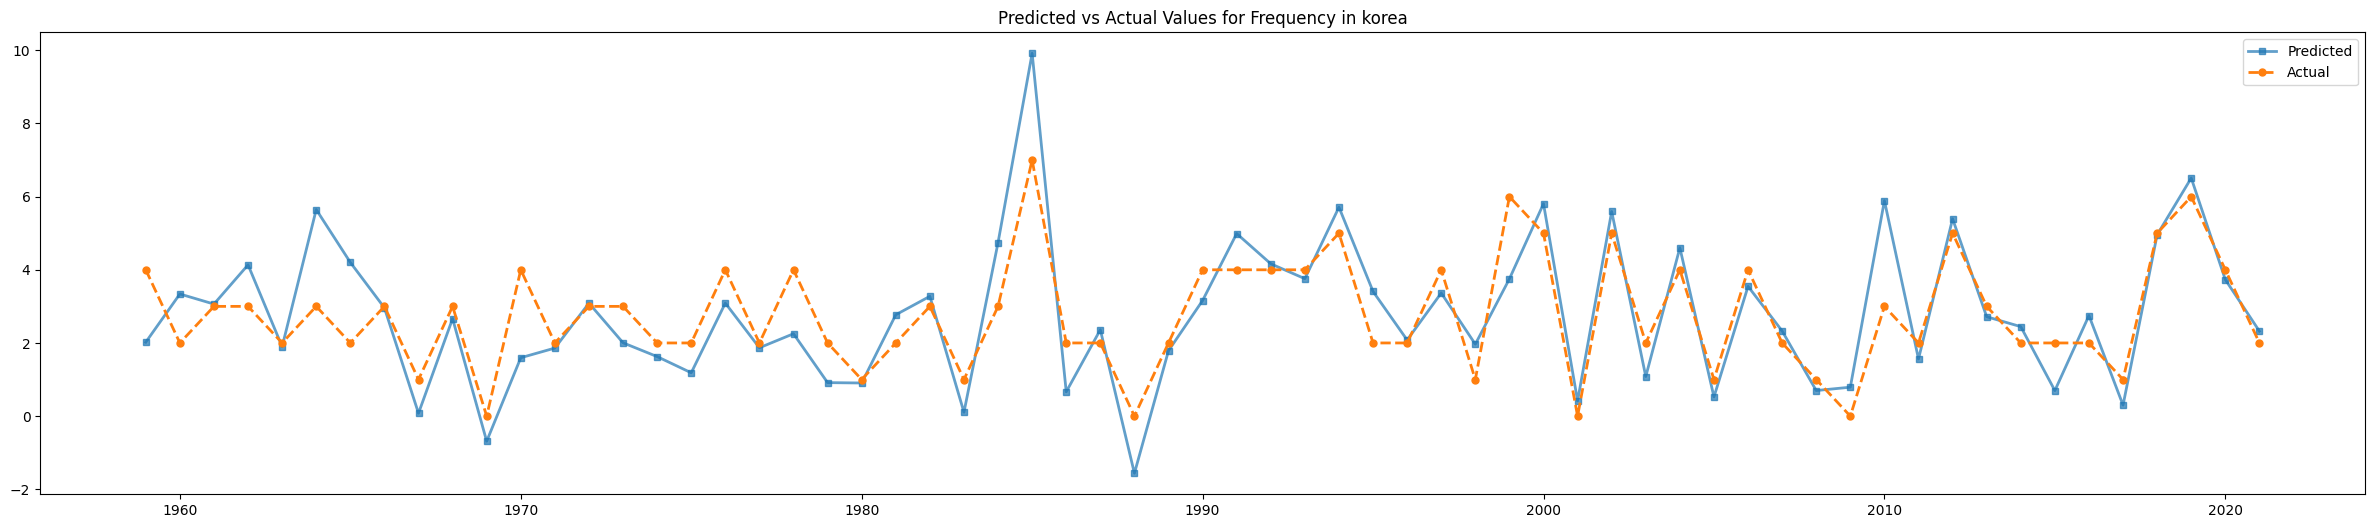

RMSE for y1: 1.7957572944433147
Correlation for y1: 0.837964228182731


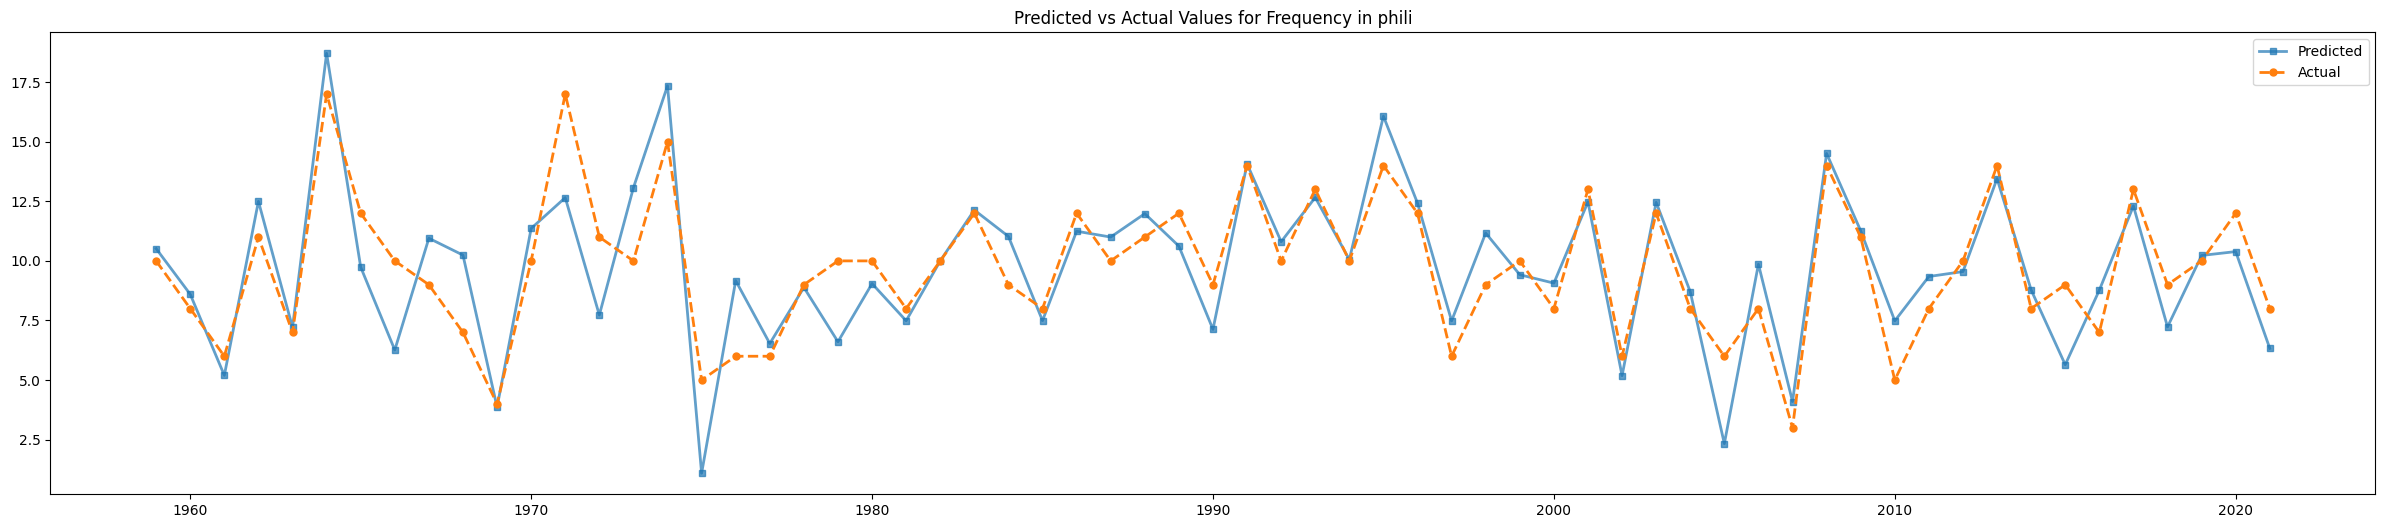

RMSE for y1: 1.3402687752209235
Correlation for y1: 0.7424987838099805


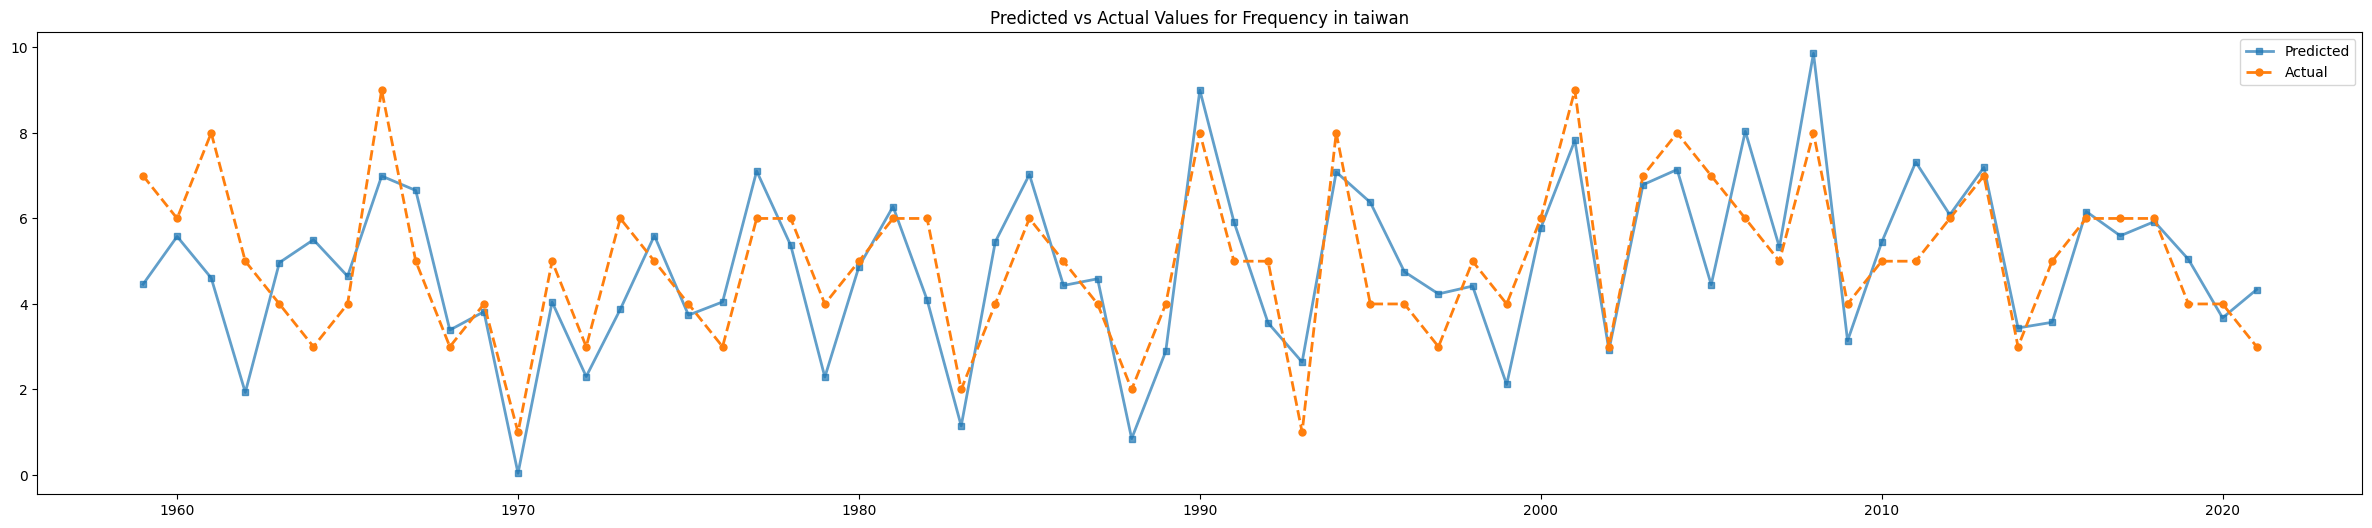

RMSE for y1: 1.870195242278948
Correlation for y1: 0.7909616135403751


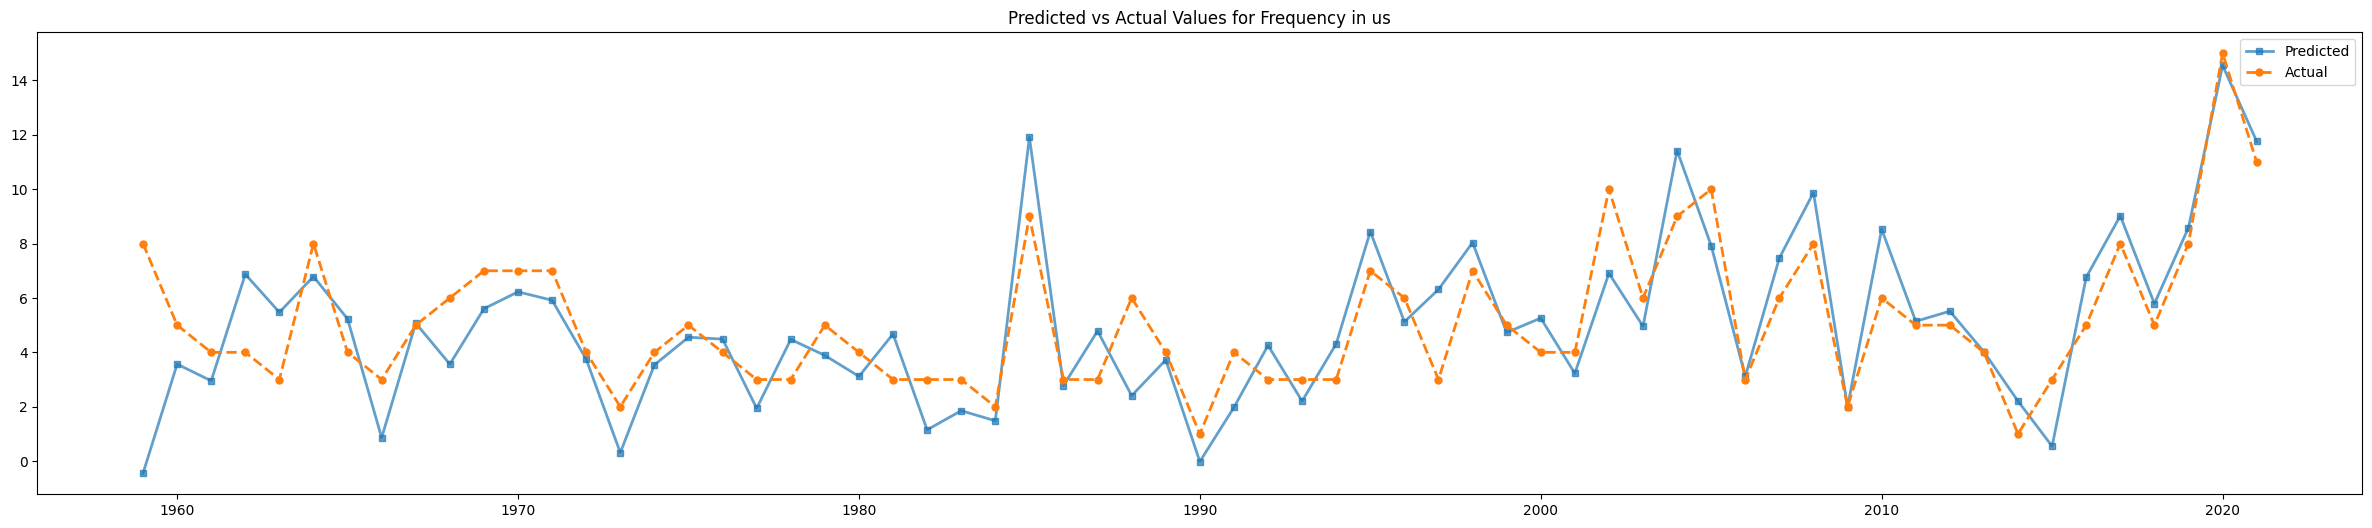

In [22]:

# Load the predictions from the CSV file
y1_pred_df = pd.read_csv('y_pred_ANN_freq_20230701.csv')

# Plot the predictions and actual values for y1 by country and month
countries = y1_pred_df['country'].unique()

for country in countries:
    country_pred_df = y1_pred_df[y1_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y1_actual': 'sum', 'y1_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y1_actual'], country_pred_df['y1_pred']))
    print("RMSE for y1:", rmse_1)
    corr = country_pred_df['y1_actual'].corr(country_pred_df['y1_pred'])
    print("Correlation for y1:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y1_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y1_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Frequency in {country}")
    plt.legend()
    plt.show()

RMSE for y1: 1.662991085641417
Correlation for y1: 0.7465151787419722


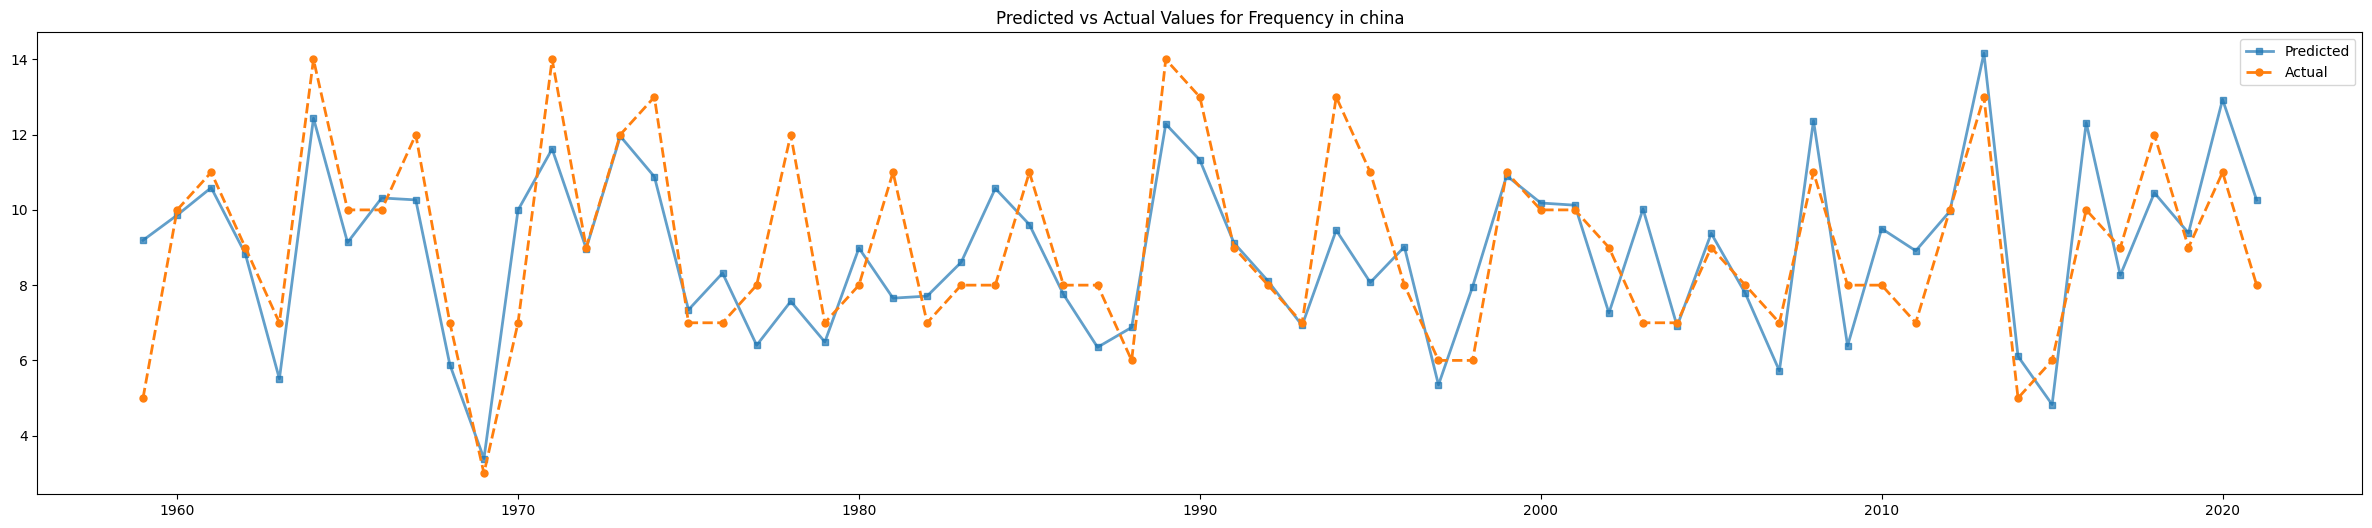

RMSE for y1: 1.640439247225962
Correlation for y1: 0.6353281415337362


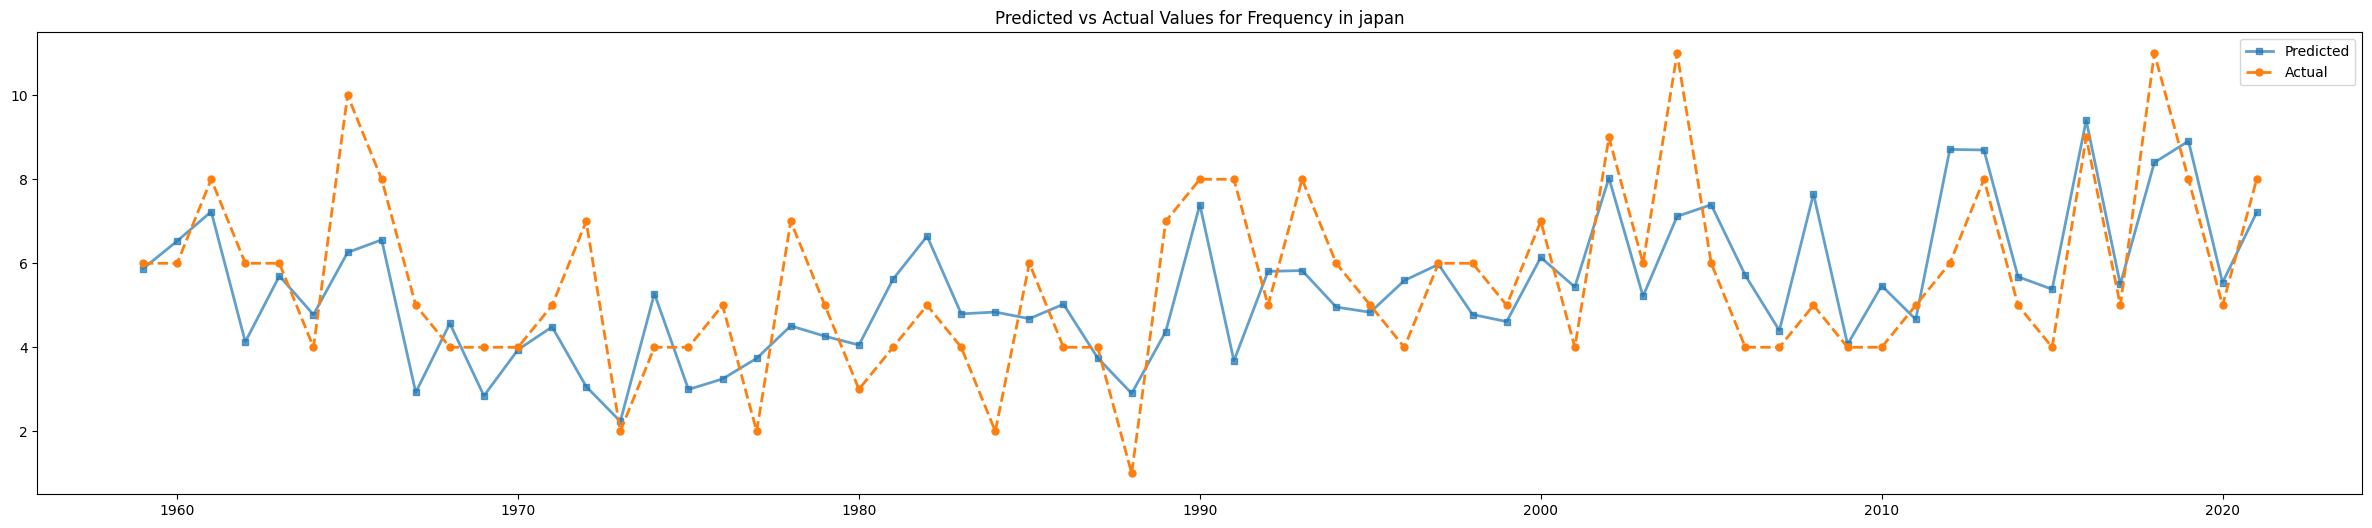

RMSE for y1: 1.276847044050884
Correlation for y1: 0.6406707726477087


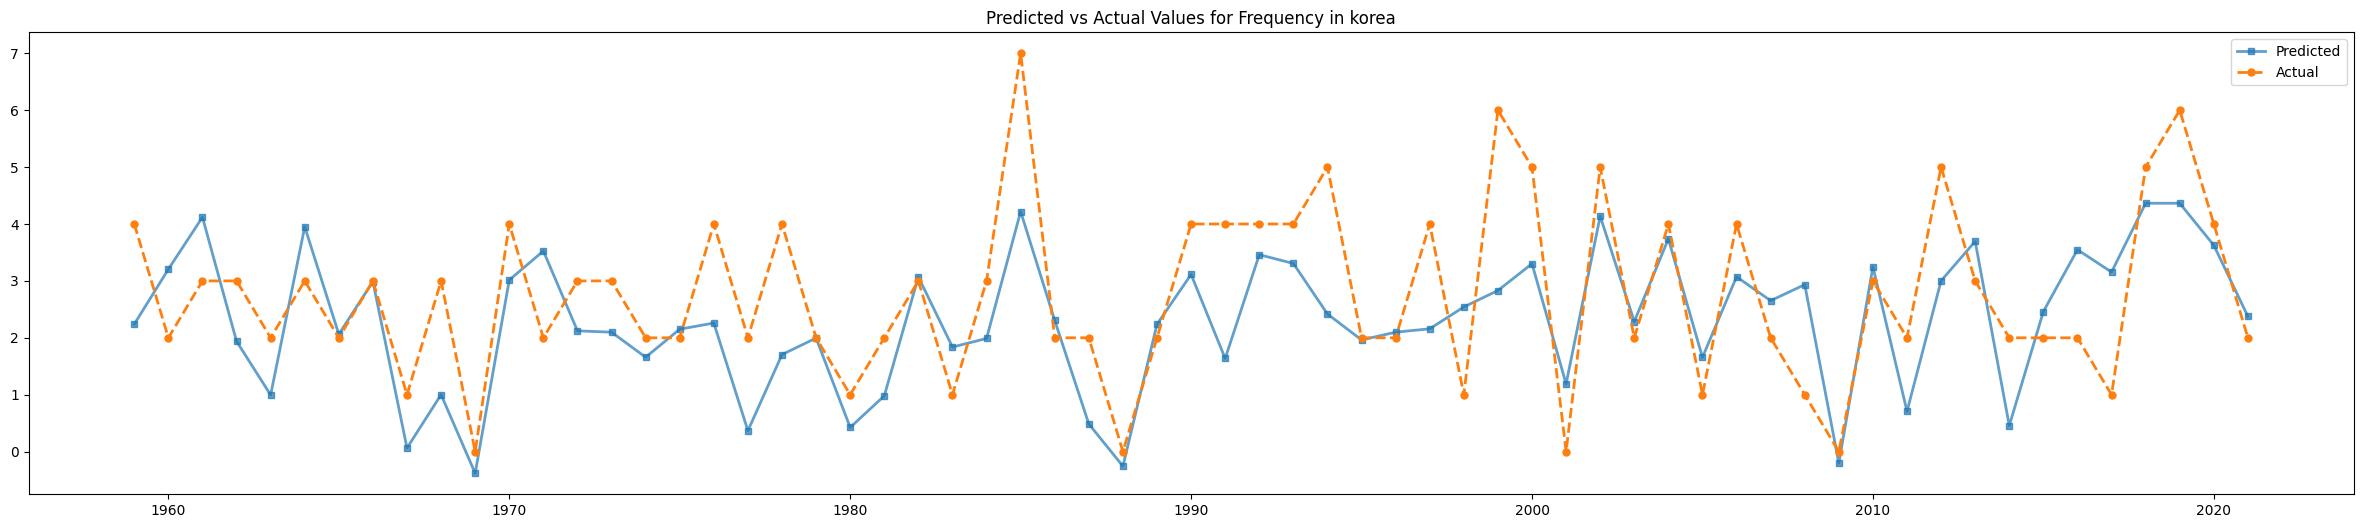

RMSE for y1: 1.922461800351239
Correlation for y1: 0.7572003191646337


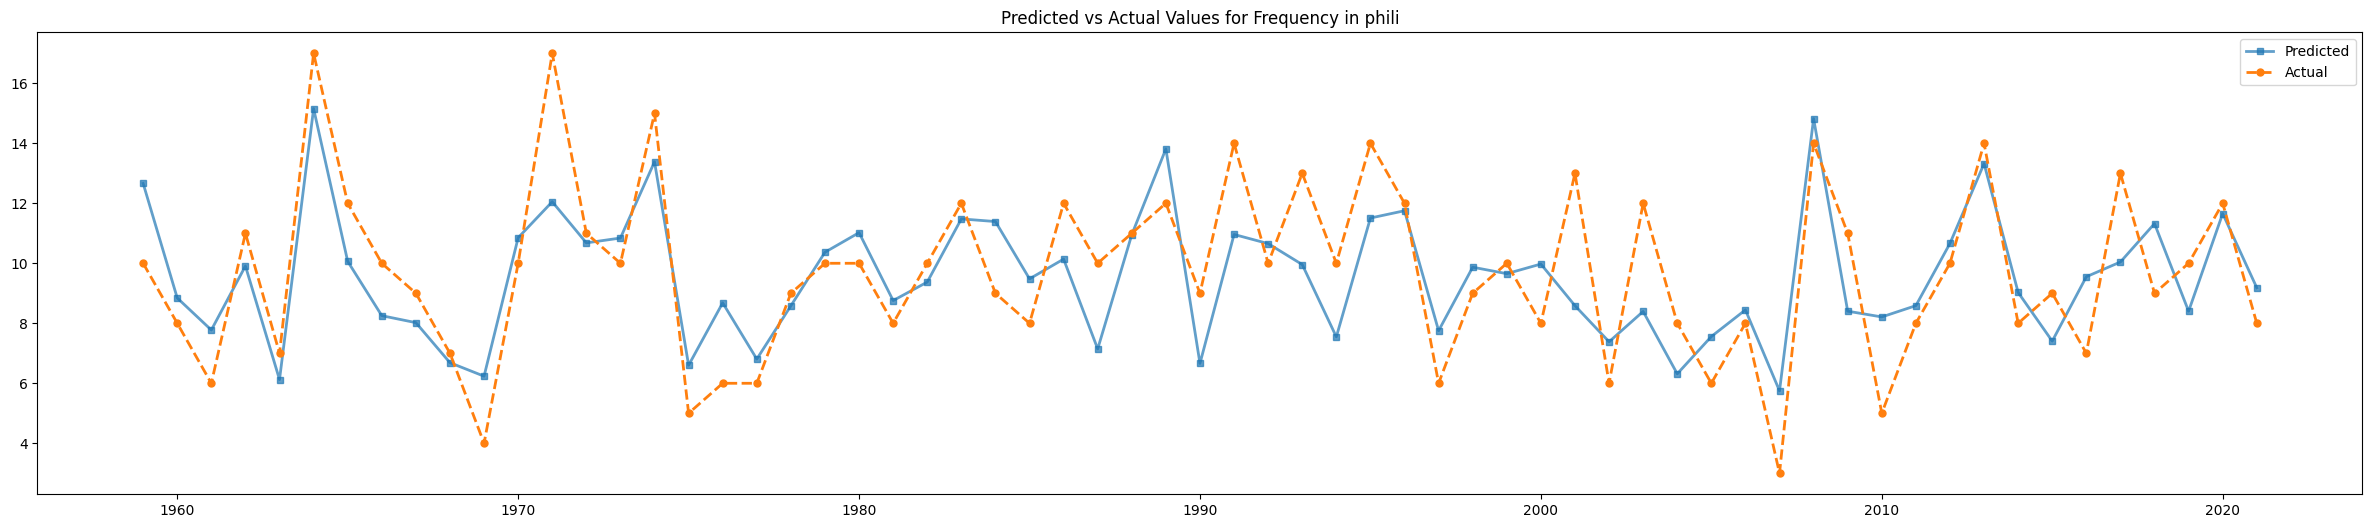

RMSE for y1: 1.4161502661541763
Correlation for y1: 0.6768730117985046


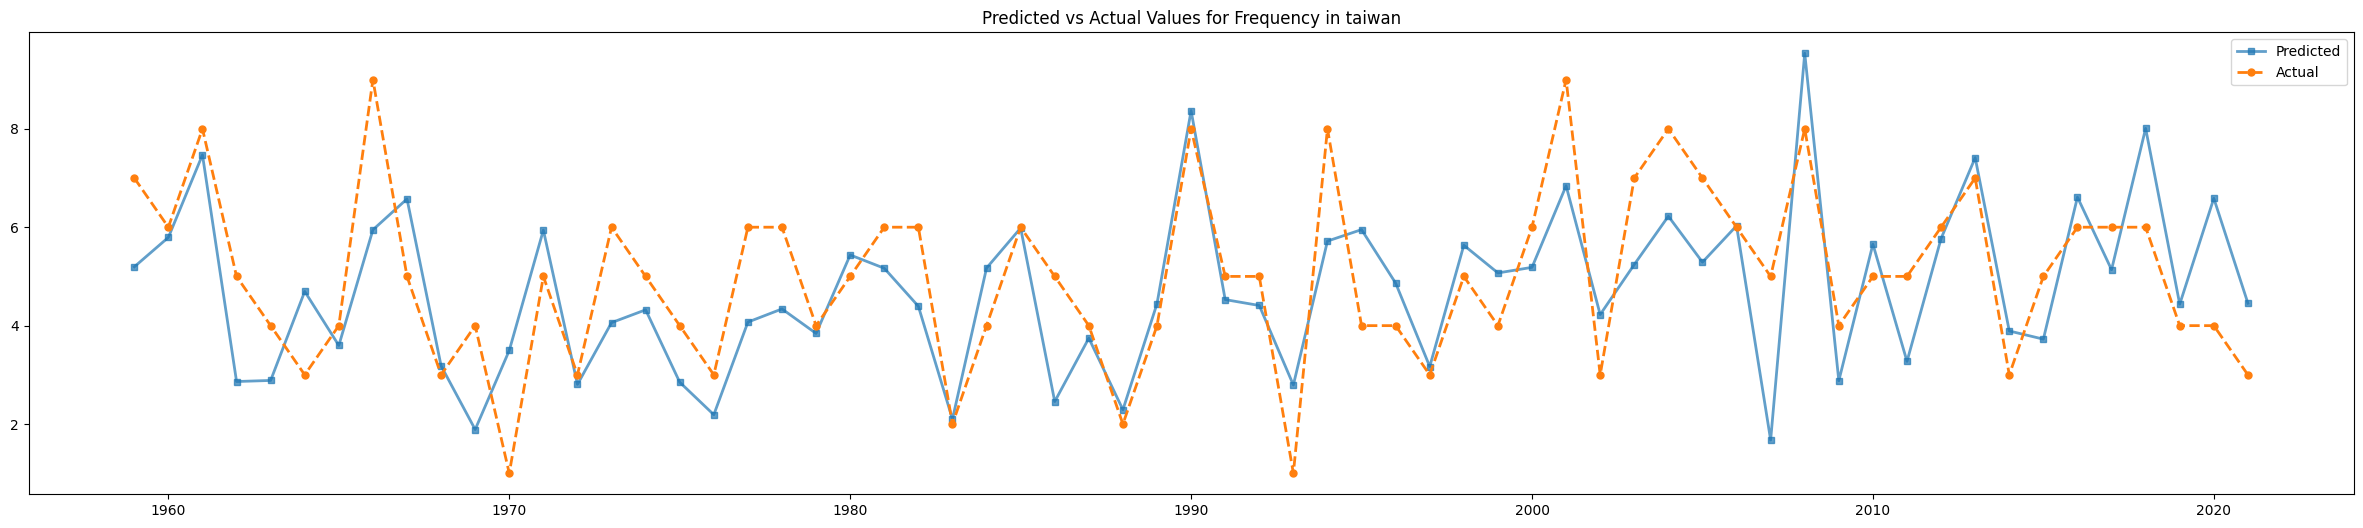

RMSE for y1: 2.2364155252542774
Correlation for y1: 0.6786192649432059


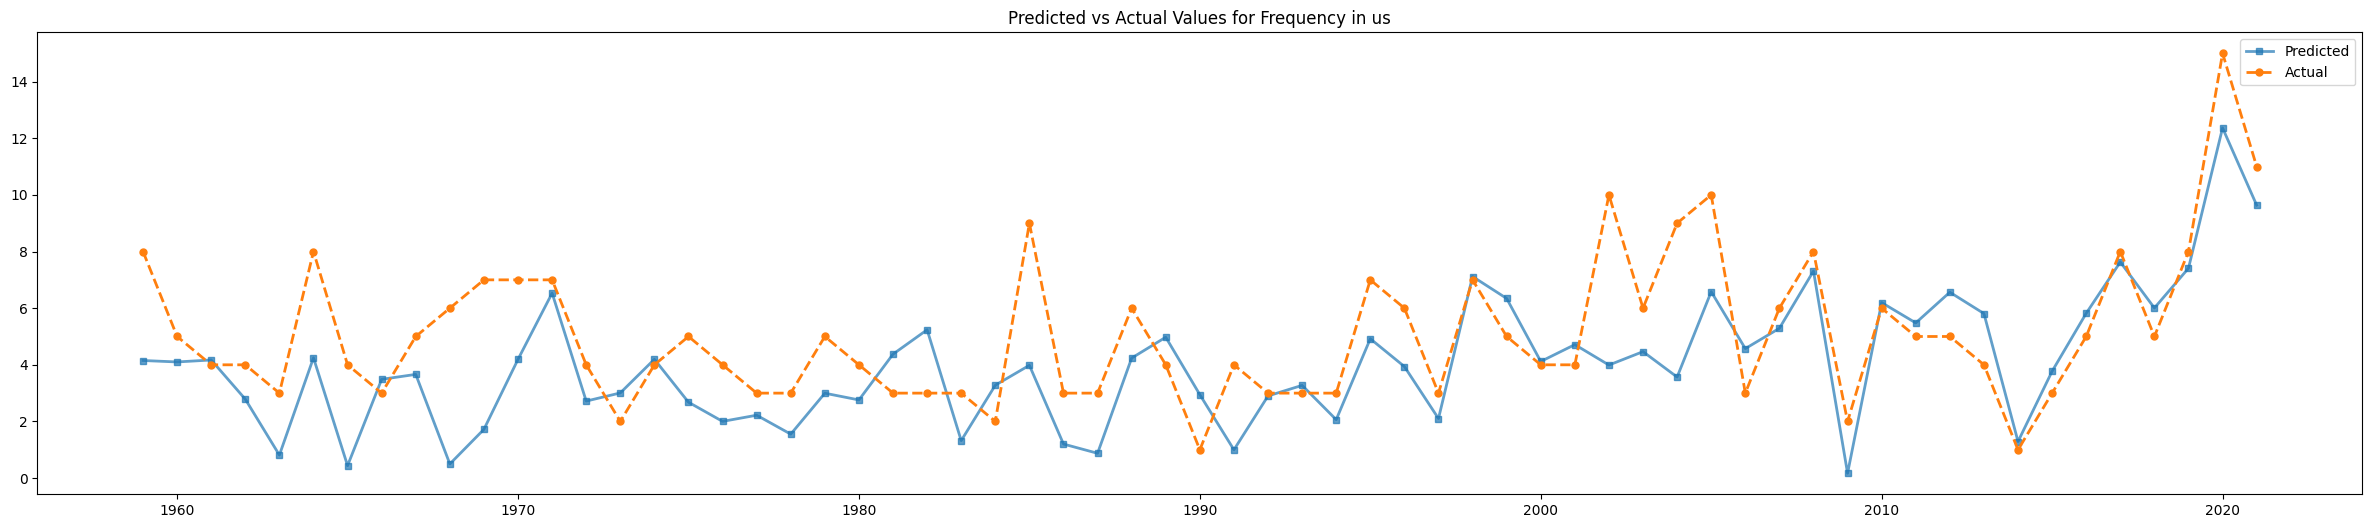

In [5]:

# Load the predictions from the CSV file
y1_pred_df = pd.read_csv('y_pred_ANN_freq_20230701_F.csv')

# Plot the predictions and actual values for y1 by country and month
countries = y1_pred_df['country'].unique()

for country in countries:
    country_pred_df = y1_pred_df[y1_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y1_actual': 'sum', 'y1_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y1_actual'], country_pred_df['y1_pred']))
    print("RMSE for y1:", rmse_1)
    corr = country_pred_df['y1_actual'].corr(country_pred_df['y1_pred'])
    print("Correlation for y1:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y1_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y1_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Frequency in {country}")
    plt.legend()
    plt.show()

In [23]:
# ANN Leavoneyearout O
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle


# Define the neural network model for predicting y2
model_2 = Sequential()
model_2.add(Dense(64, input_dim=30, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="linear"))
model_2.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y2 and y2

y2_preds = []
y2_actuals = []
y2_test_country = []
y2_test_month = []
y2_test_year = []


# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
intendf = intendf[~intendf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Loop over each year and perform LOOCV

for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    intendf_x2_train = intendf[intendf['year'] != year].iloc[:,1:31]
    intendf_x2_test = intendf[intendf['year'] == year].iloc[:,1:31]
    intendf_y2_train = intendf[intendf['year'] != year].iloc[:,[0, 1, 33, 31]]
    intendf_y2_test = intendf[intendf['year'] == year].iloc[:,[0, 1, 33, 31]]

    # Train the model on the training set
    model_2.fit(intendf_x2_train, intendf_y2_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y2_pred = model_2.predict(intendf_x2_test)

    # Add the predictions and actual values to the respective lists
    y2_preds.extend(y2_pred)
    y2_actuals.extend(intendf_y2_test.iloc[:,3].values)
    y2_test_year.extend(intendf_y2_test.iloc[:,0].values)
    y2_test_month.extend(intendf_y2_test.iloc[:,1].values)
    y2_test_country.extend(intendf_y2_test.iloc[:,2].values)

# Convert predictions to DataFrame and concatenate with country and month columns
y2_pred_df = pd.DataFrame({"year": y2_test_year, "month": y2_test_month, "country": y2_test_country, "y2_pred": np.squeeze(y2_preds),"y2_actual": y2_actuals})
y2_pred_df = y2_pred_df[['year', 'month', 'country', 'y2_pred', 'y2_actual']]

# Save predictions to CSV file
y2_pred_df.to_csv('y_pred_ANN_inten_20230701.csv', index=False)

import pickle

# 모델 저장
with open('model_inten_20230701.pkl', 'wb') as f:
    pickle.dump(model_2, f)


3/3 [==============================] - 0s 5ms/step


In [24]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle


# Define the neural network model for predicting y2
model_2 = Sequential()
model_2.add(Dense(64, input_dim=30, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="linear"))
model_2.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y2 and y2

y2_preds = []
y2_actuals = [].0

y2_test_country = []
y2_test_month = []
y2_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
intendf = intendf[~intendf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Split the data into training and test sets
intendf_x2_train = intendf.iloc[:,1:31]
intendf_x2_test = intendf.iloc[:,1:31]
intendf_y2_train = intendf.iloc[:,[0, 1, 33, 31]]
intendf_y2_test = intendf.iloc[:,[0, 1, 33, 31]]

# Train the model on the entire training set
model_2.fit(intendf_x2_train, intendf_y2_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

# Predict the output for the test set
y2_pred = model_2.predict(intendf_x2_test)

# Convert predictions to DataFrame and concatenate with country and month columns
y2_pred_df = pd.DataFrame({"year": intendf_y2_test.iloc[:,0].values, "month": intendf_y2_test.iloc[:,1].values, "country": intendf_y2_test.iloc[:,2].values, "y2_pred": np.squeeze(y2_pred),"y2_actual": intendf_y2_test.iloc[:,3].values})
y2_pred_df = y2_pred_df[['year', 'month', 'country', 'y2_pred', 'y2_actual']]

# Save predictions to CSV file
y2_pred_df.to_csv('y_pred_ANN_inten_20230701_F.csv', index=False)

import pickle

# 모델 저장
with open('model_inten_20230701_F.pkl', 'wb') as f:
    pickle.dump(model_2, f)


142/142 [==============================] - 0s 2ms/step


RMSE for y2: 4.169459761931762
Correlation for y2: 0.7965886095144201


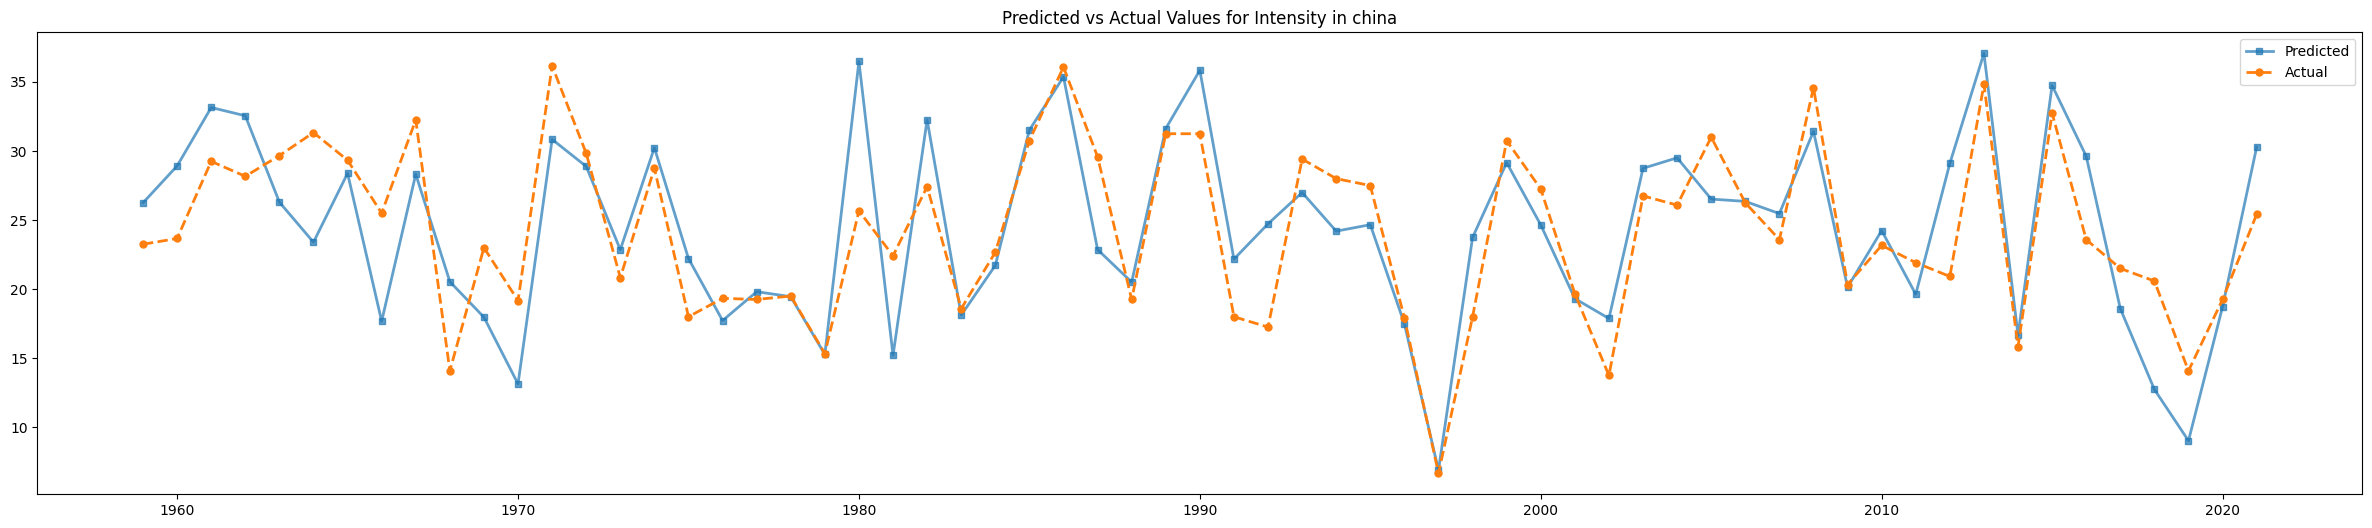

RMSE for y2: 4.250758020130999
Correlation for y2: 0.7483400417016501


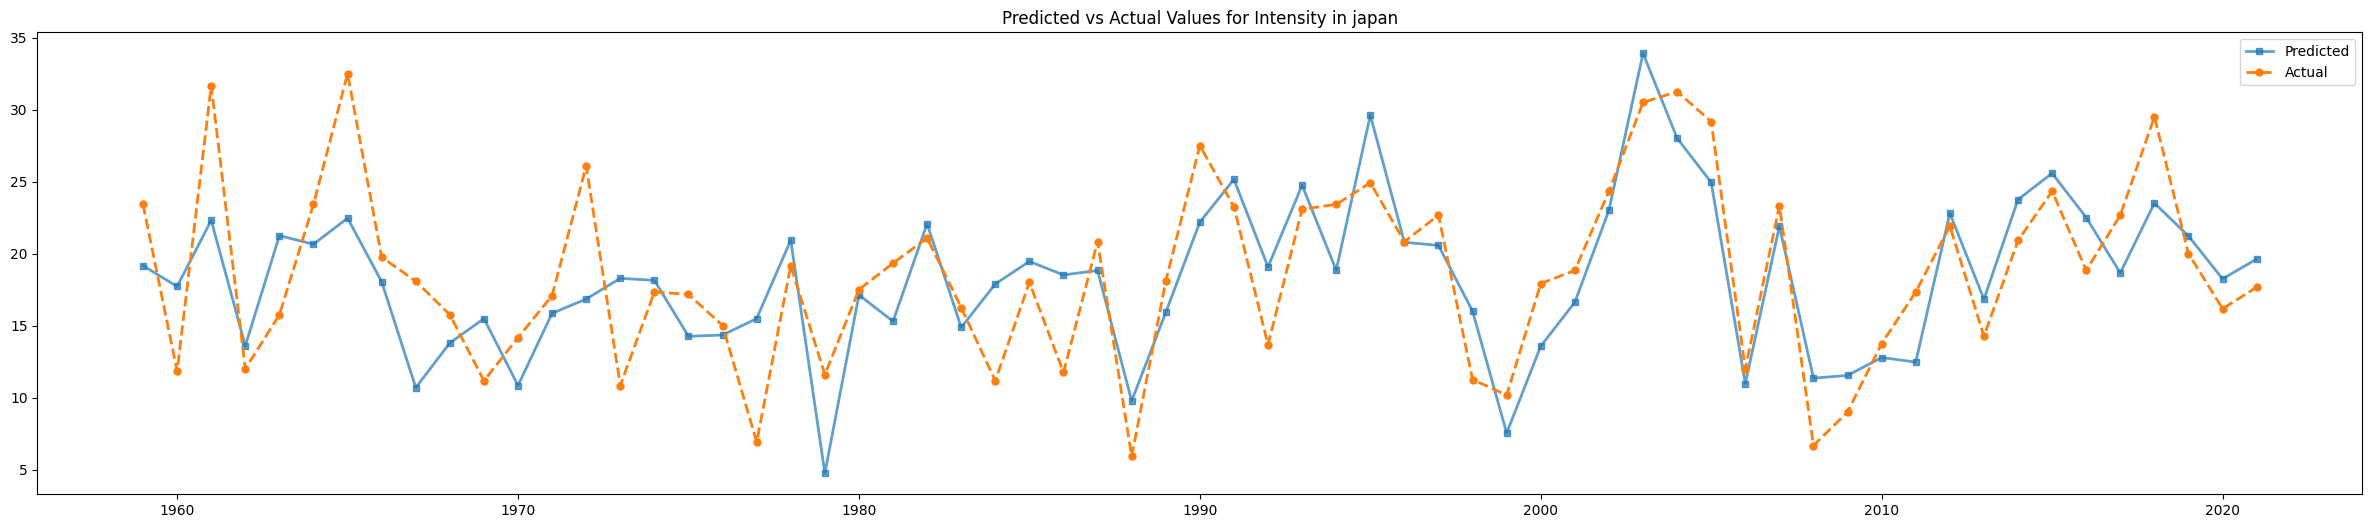

RMSE for y2: 3.733304115554315
Correlation for y2: 0.7302562925296615


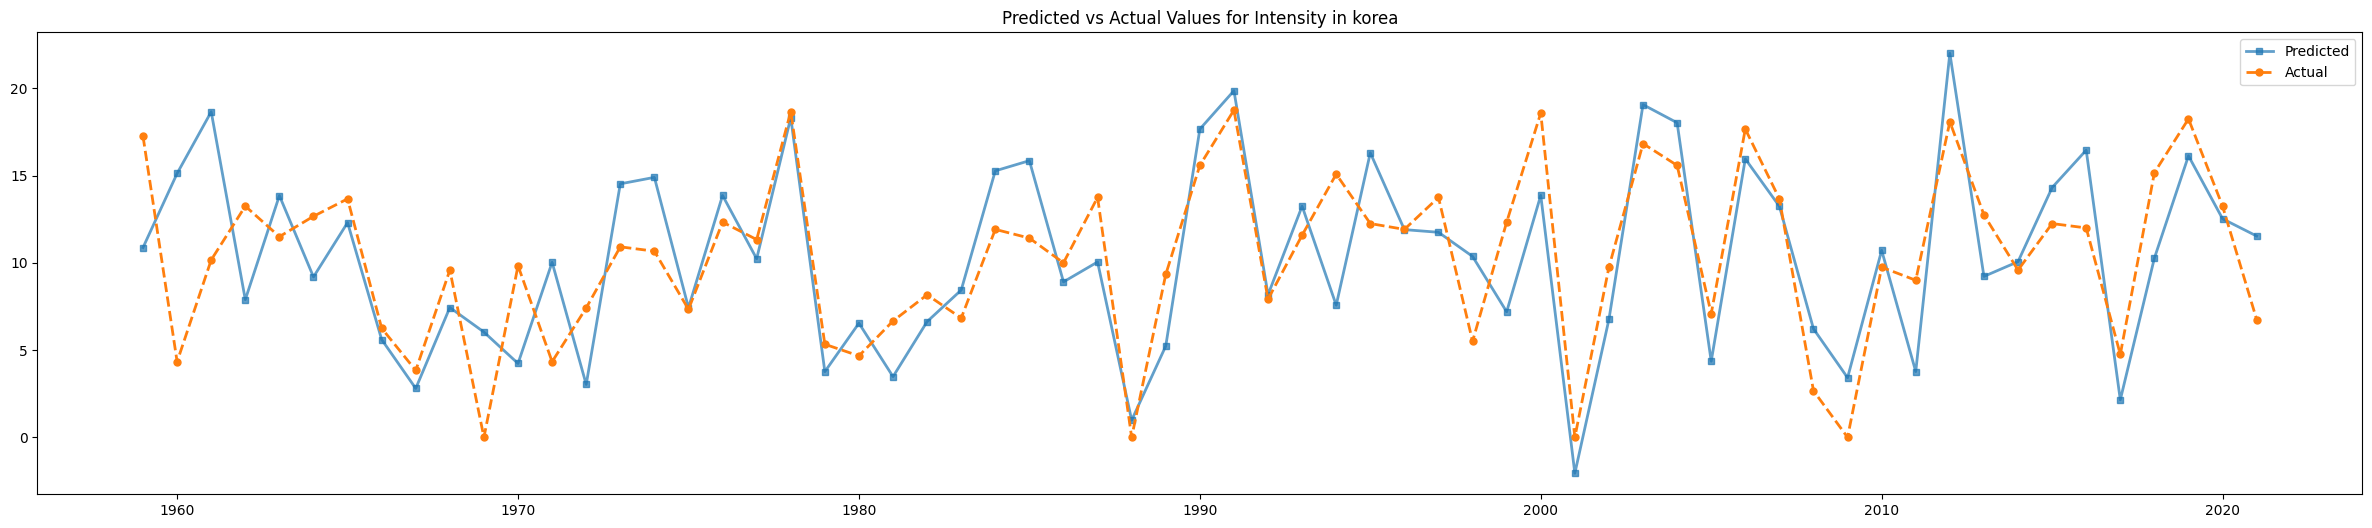

RMSE for y2: 5.684234596102204
Correlation for y2: 0.804999619619691


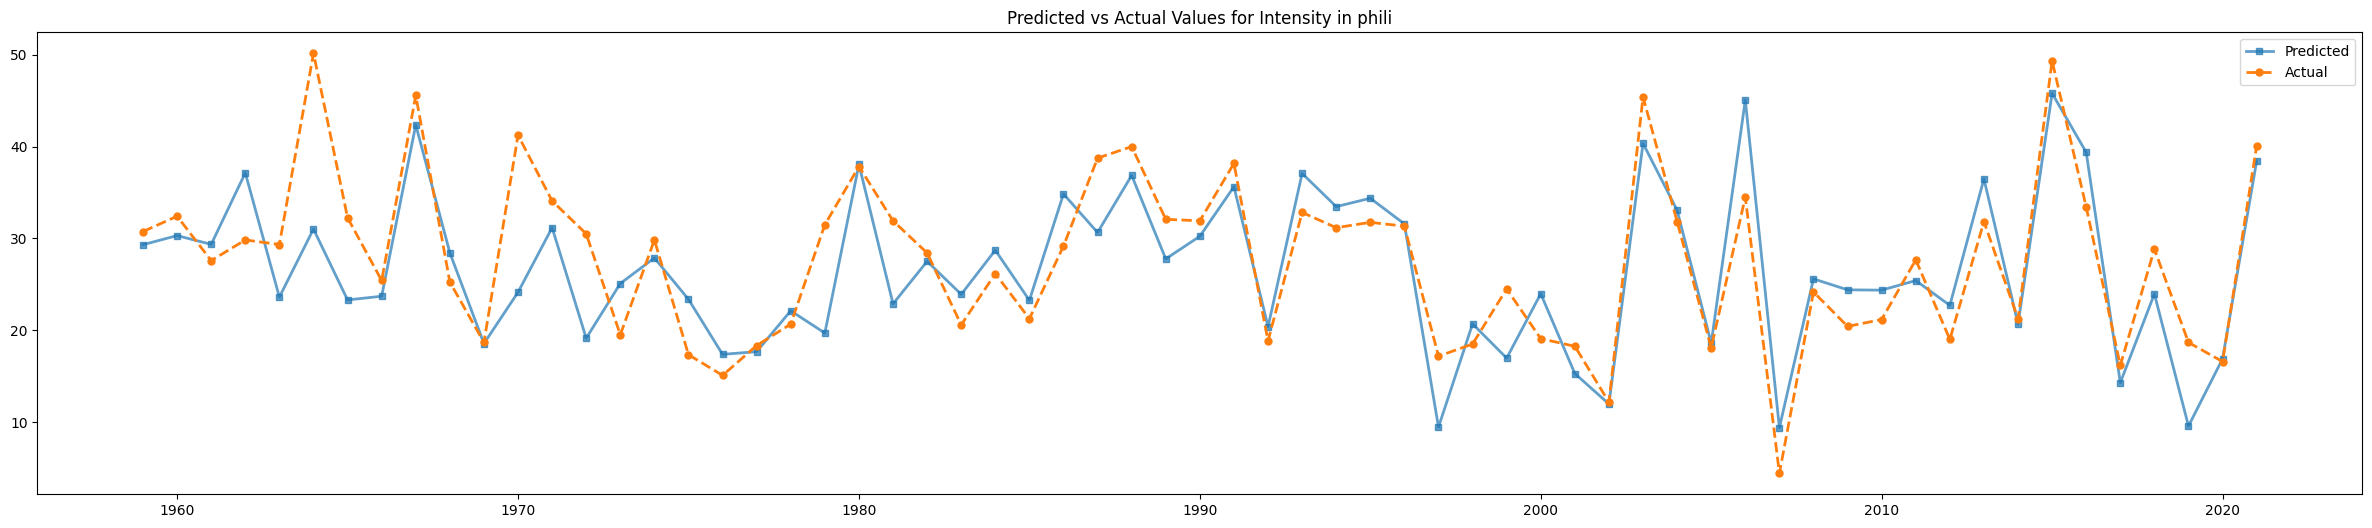

RMSE for y2: 4.492015929201239
Correlation for y2: 0.8353906044626539


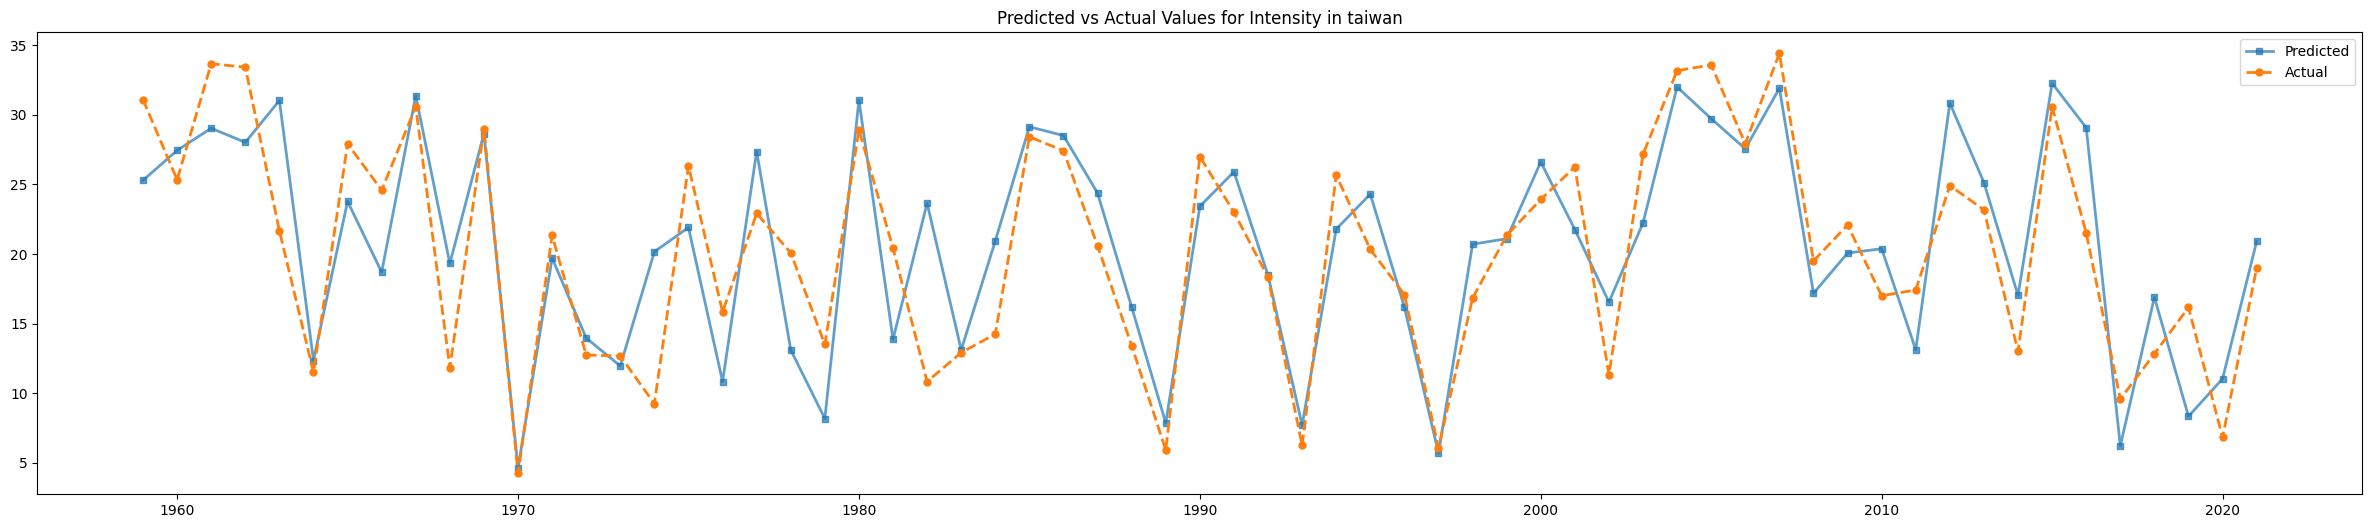

RMSE for y2: 4.842822331175182
Correlation for y2: 0.6877643391316199


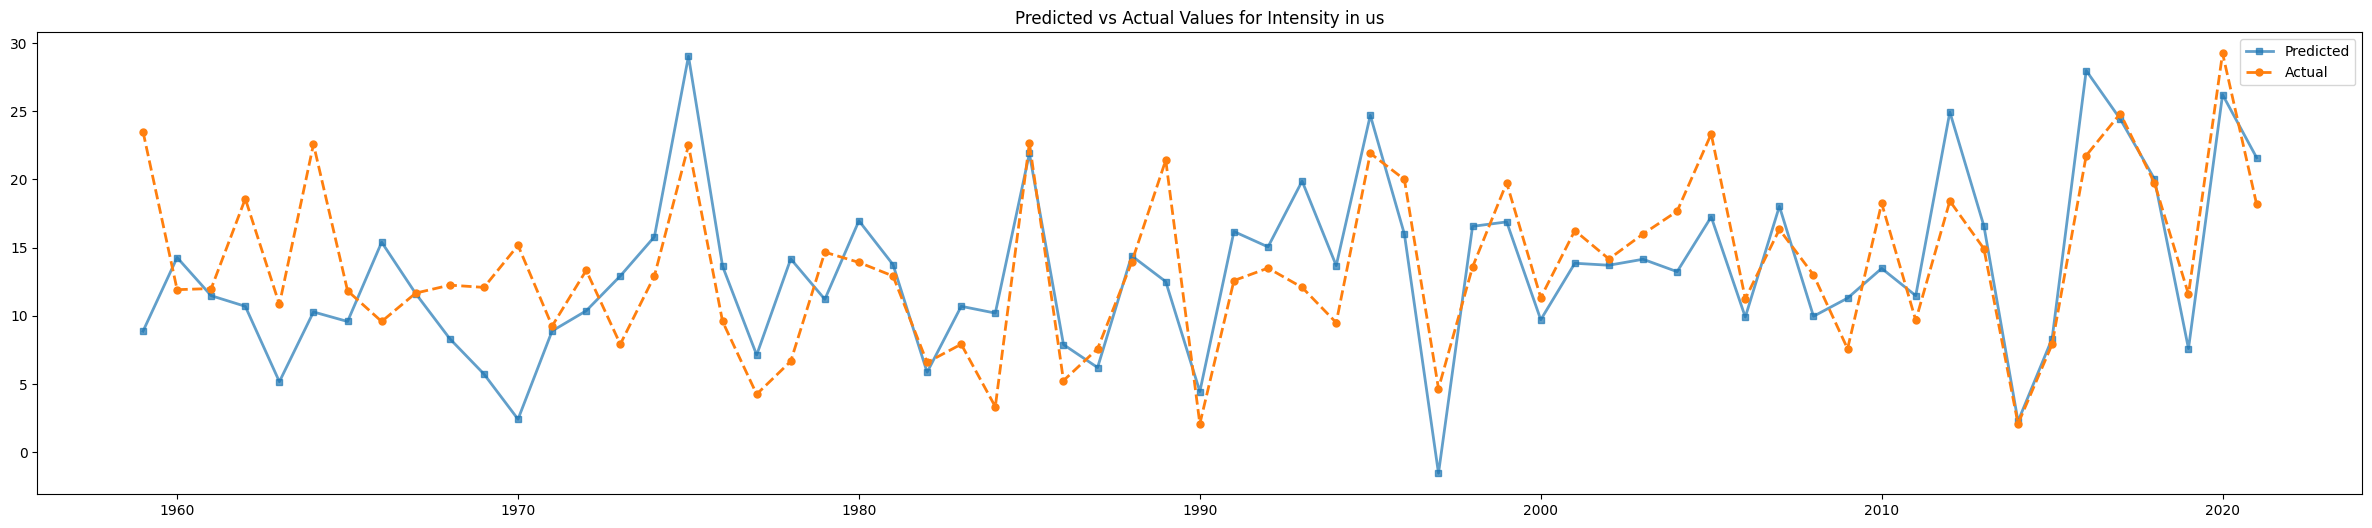

In [25]:
# Load the predictions from the CSV file
y2_pred_df = pd.read_csv('y_pred_ANN_inten_20230701.csv')

# Plot the predictions and actual values for y2 by country and month
countries = y2_pred_df['country'].unique()

for country in countries:
    country_pred_df = y2_pred_df[y2_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y2_actual': 'mean', 'y2_pred': 'mean'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y2_actual'], country_pred_df['y2_pred']))
    print("RMSE for y2:", rmse_1)
    corr = country_pred_df['y2_actual'].corr(country_pred_df['y2_pred'])
    print("Correlation for y2:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y2_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y2_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Intensity in {country}")
    plt.legend()
    plt.show()


RMSE for y2: 4.7544930513319725
Correlation for y2: 0.6551203799625225


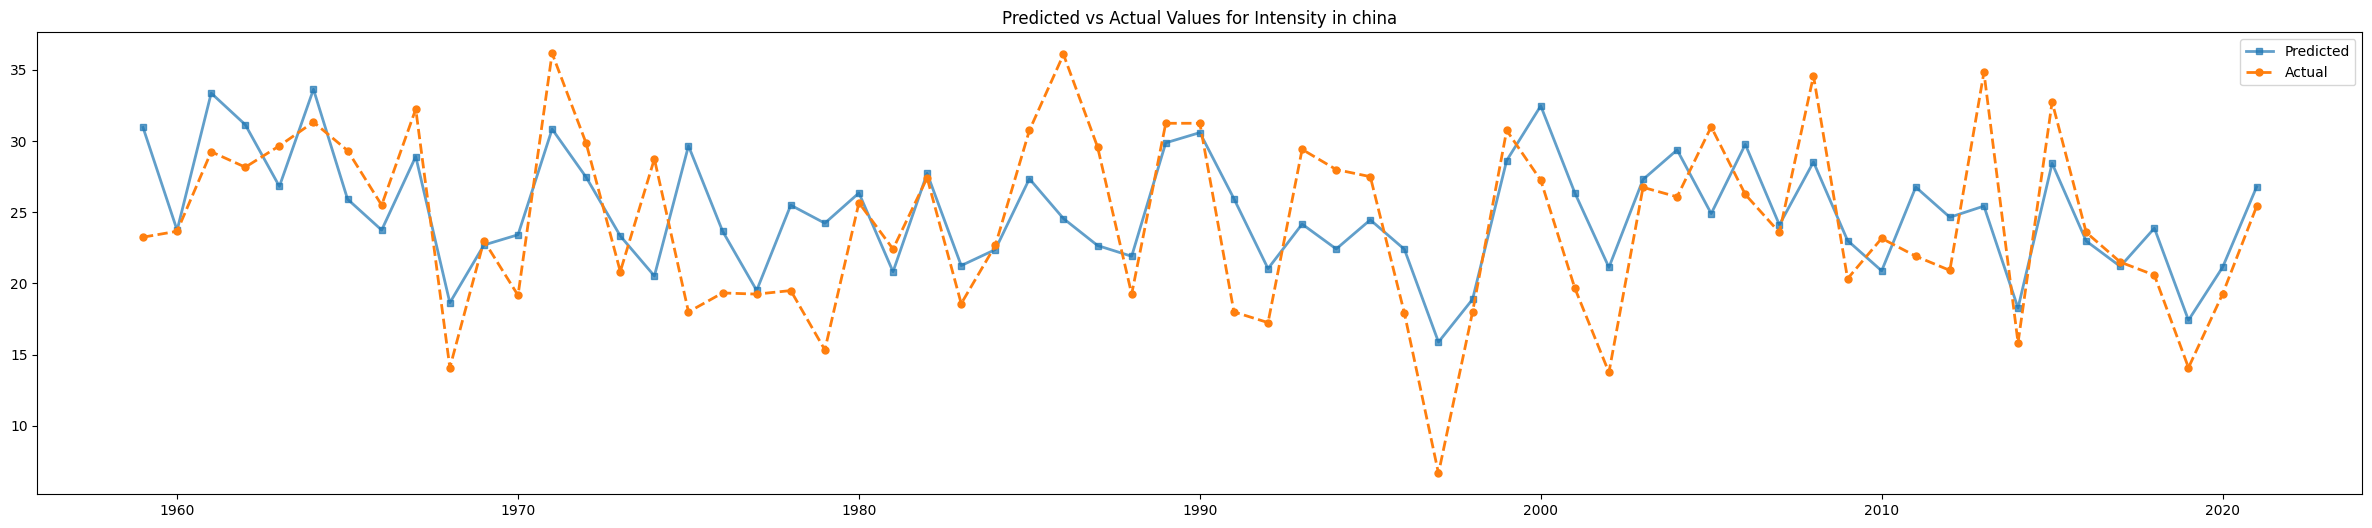

RMSE for y2: 4.834670912161007
Correlation for y2: 0.6546573730392515


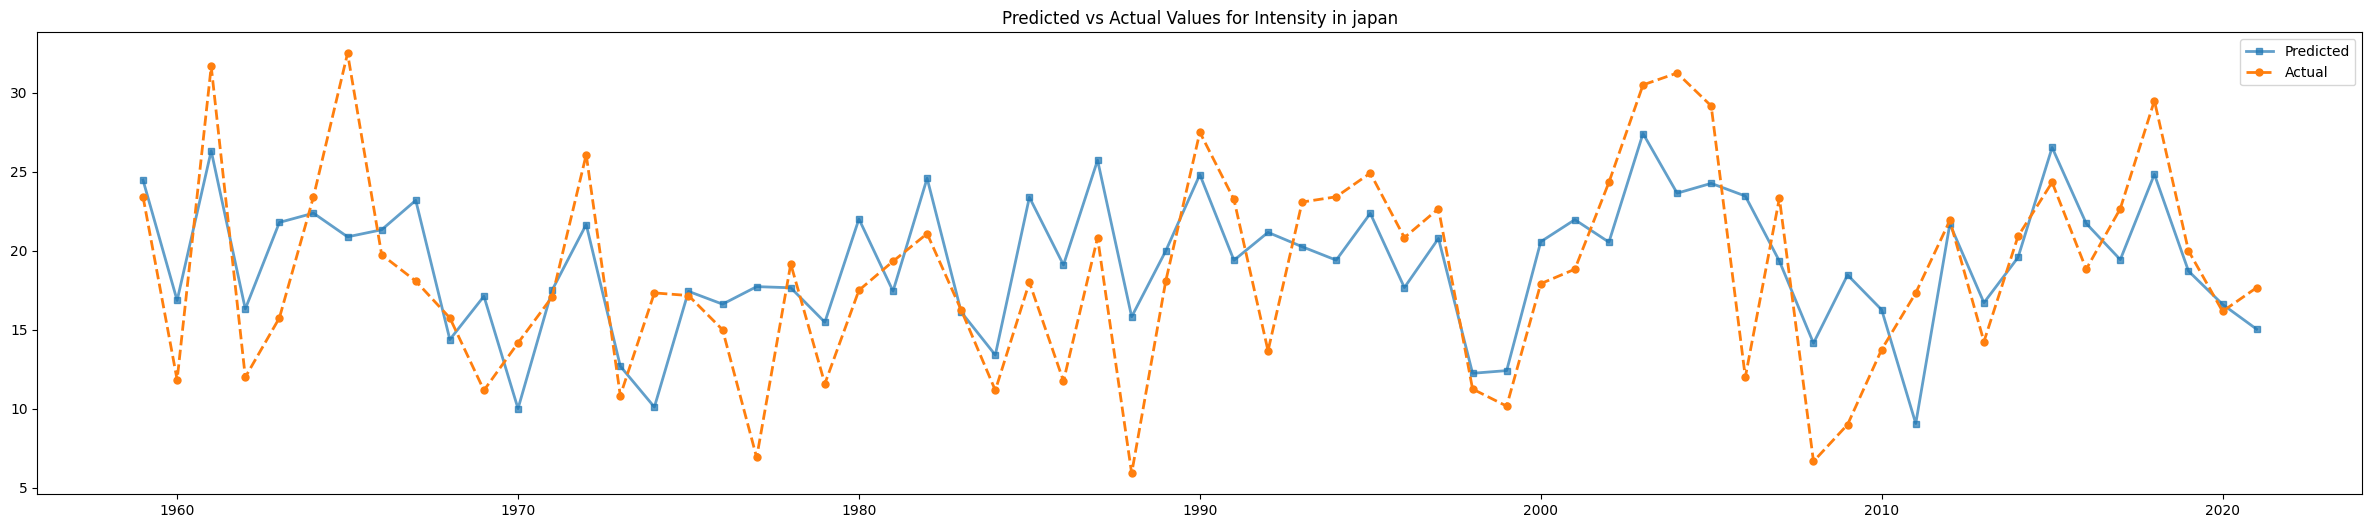

RMSE for y2: 4.685484902884624
Correlation for y2: 0.3635103284925111


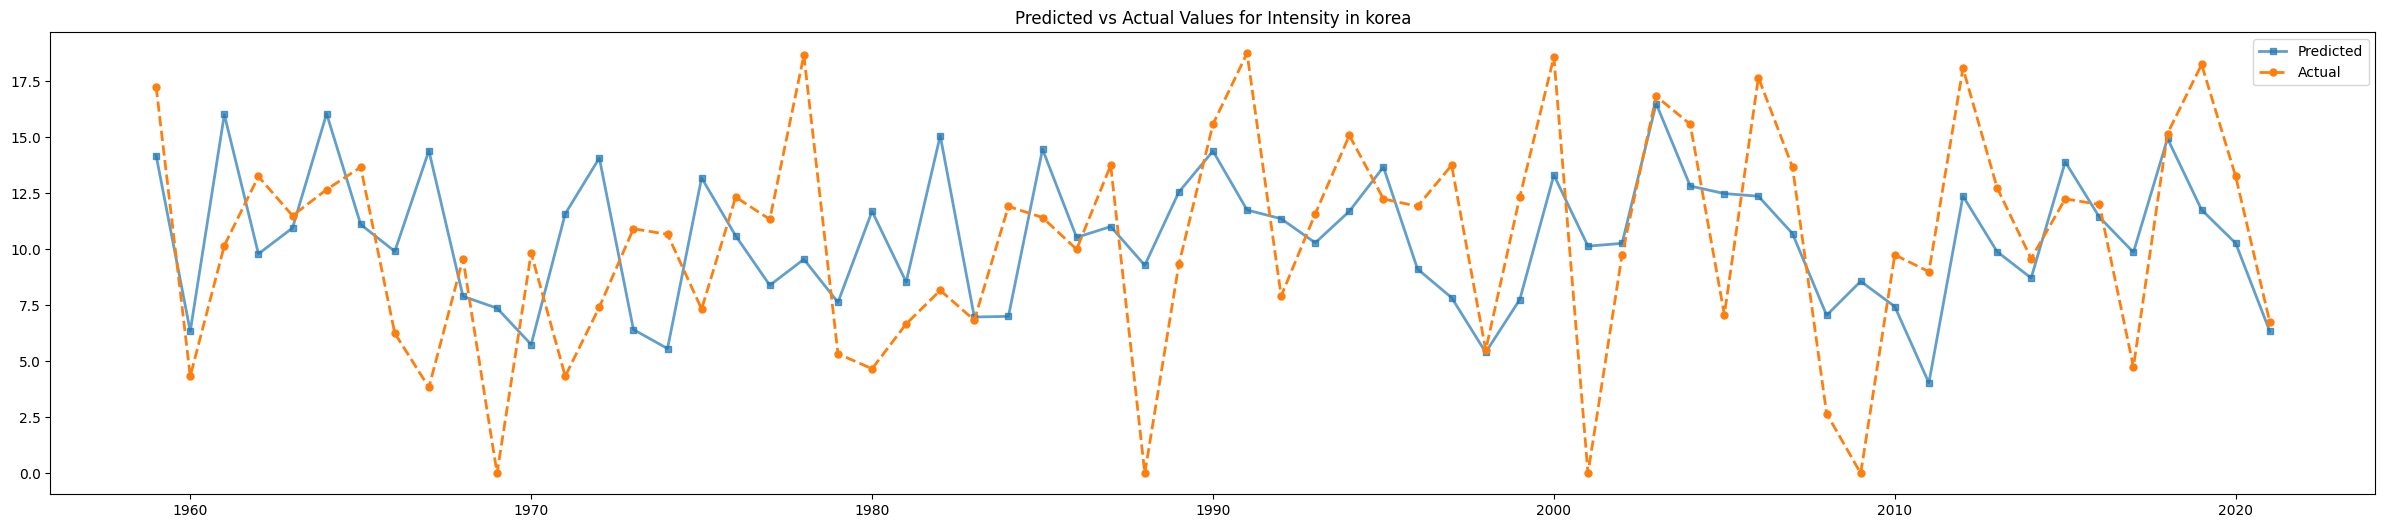

RMSE for y2: 7.41683107991752
Correlation for y2: 0.6080106011865513


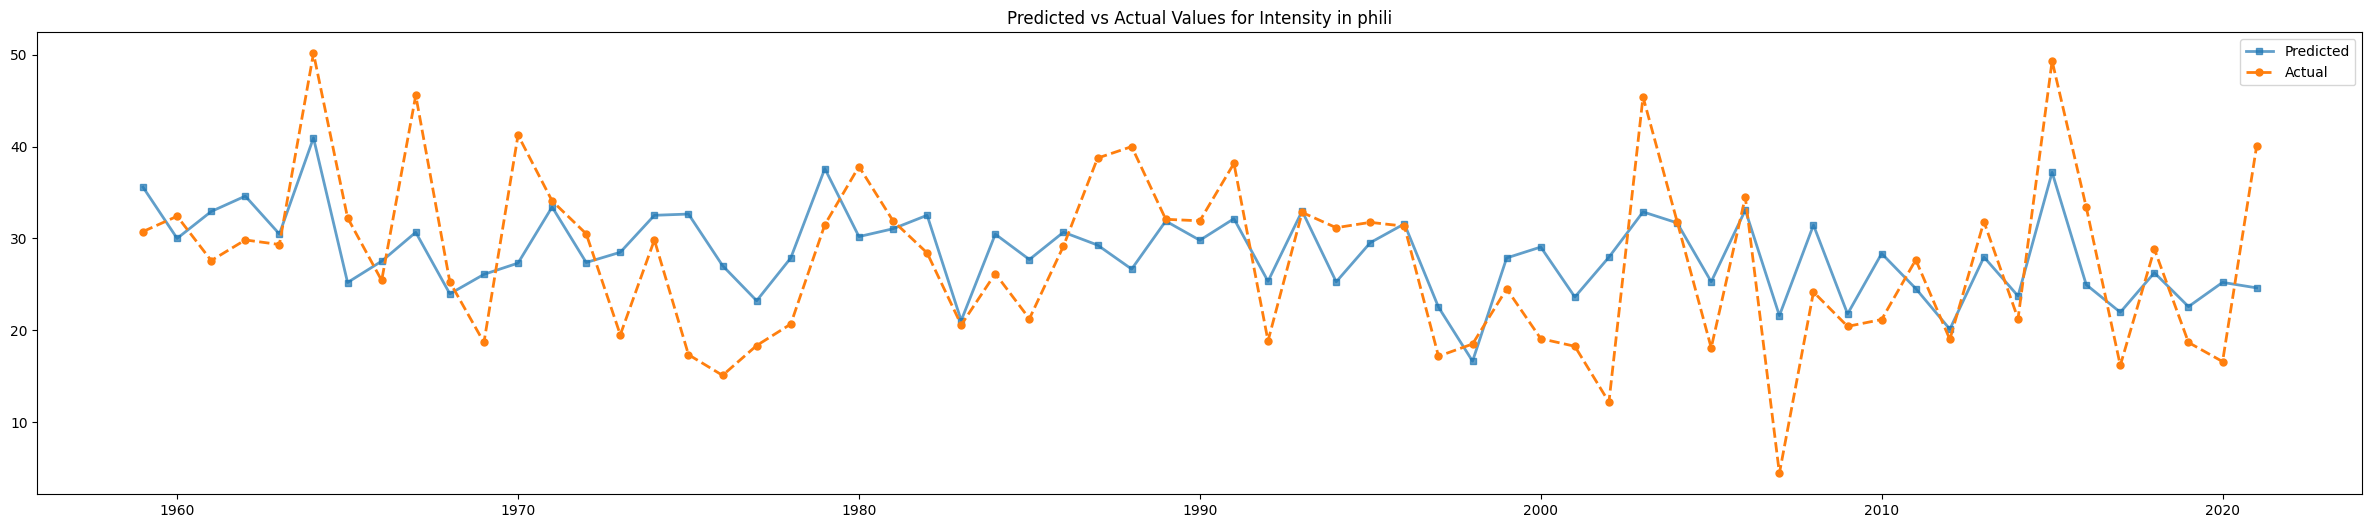

RMSE for y2: 6.2350529957834855
Correlation for y2: 0.6433960160171011


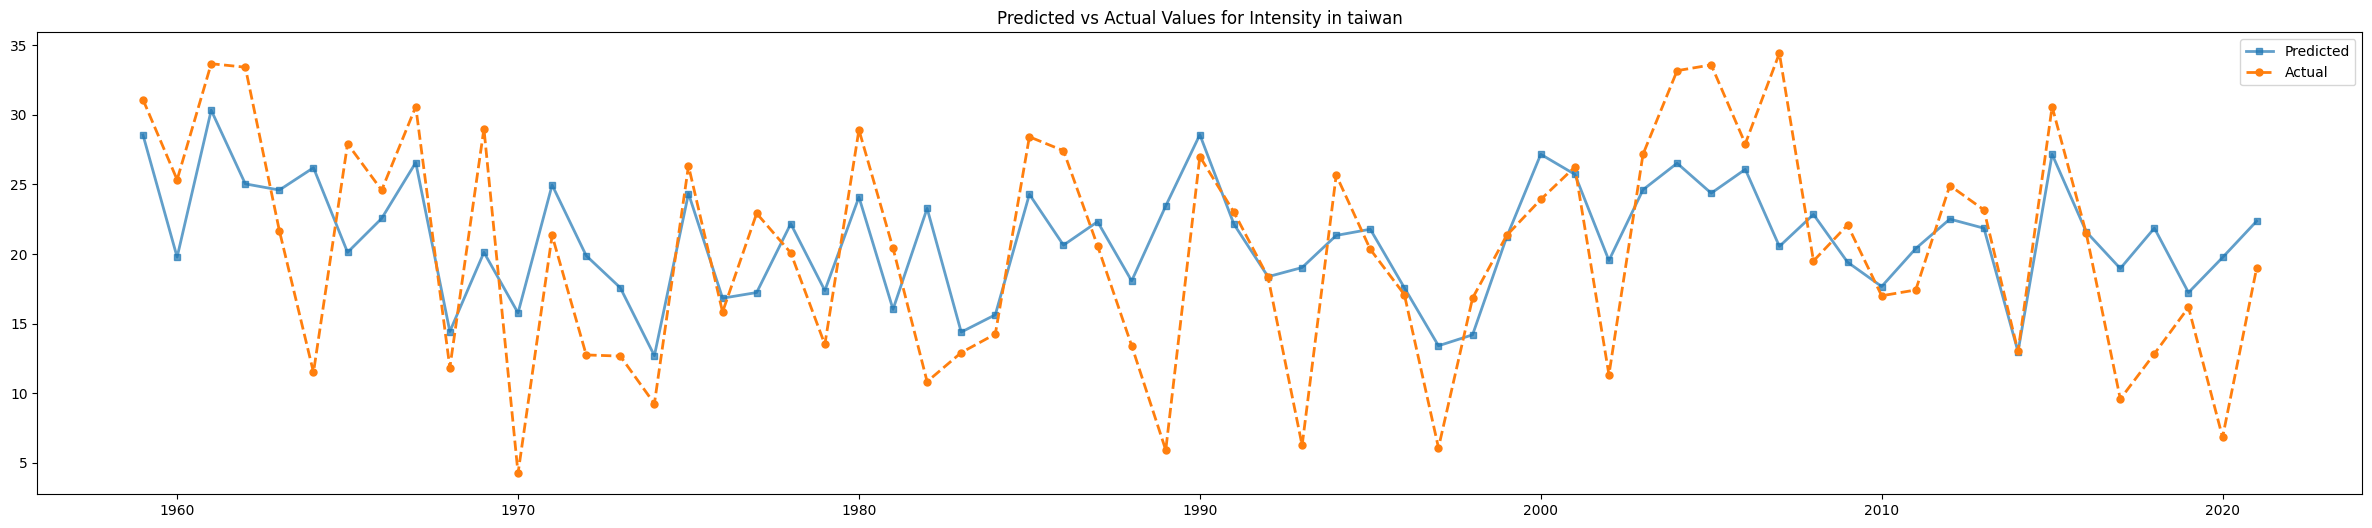

RMSE for y2: 4.856917065669942
Correlation for y2: 0.5925301510293586


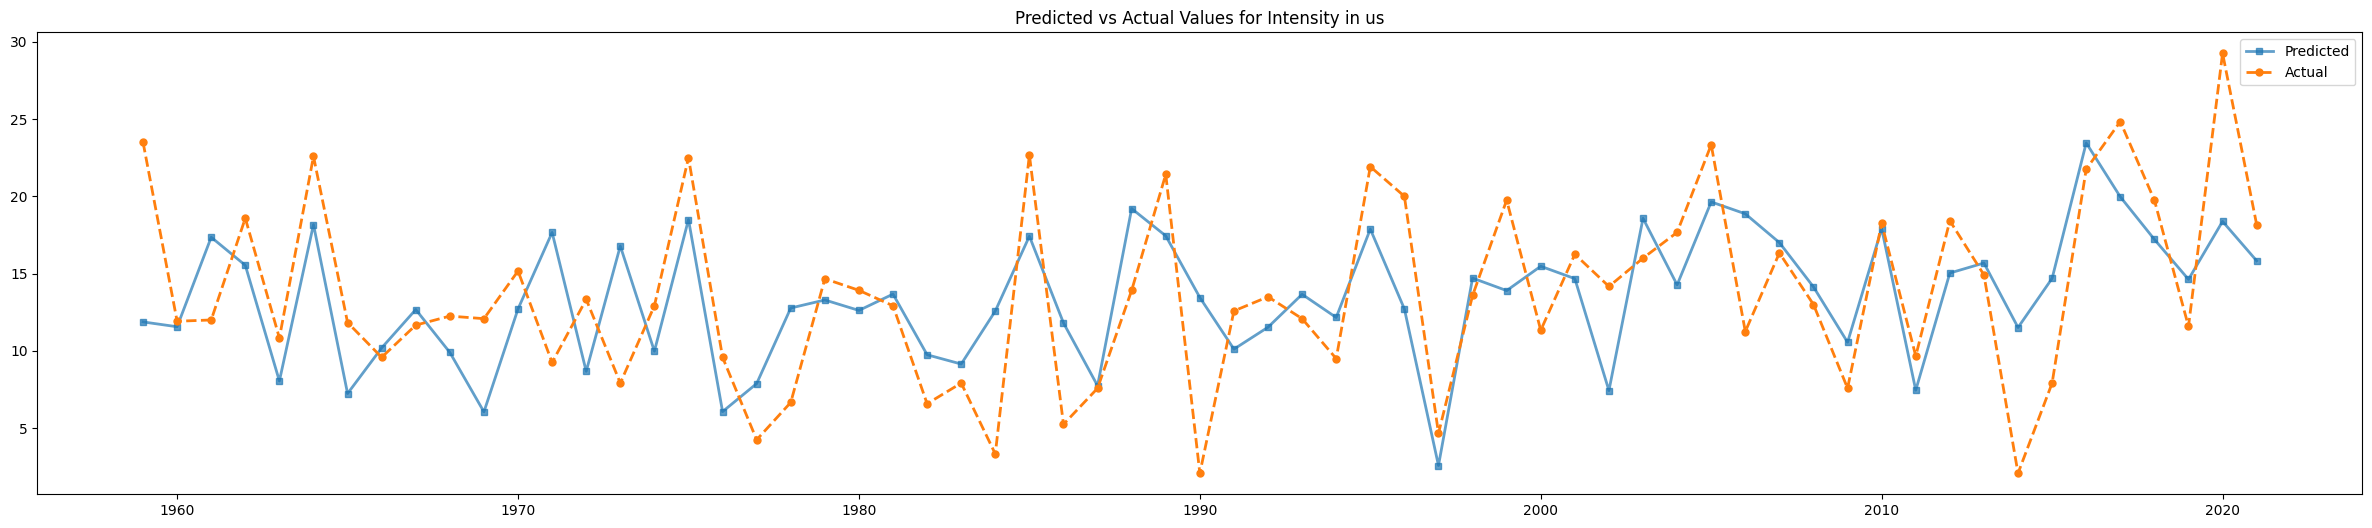

In [4]:
# Load the predictions from the CSV file
y2_pred_df = pd.read_csv('y_pred_ANN_inten_20230701_F.csv')

# Plot the predictions and actual values for y2 by country and month
countries = y2_pred_df['country'].unique()

for country in countries:
    country_pred_df = y2_pred_df[y2_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y2_actual': 'mean', 'y2_pred': 'mean'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y2_actual'], country_pred_df['y2_pred']))
    print("RMSE for y2:", rmse_1)
    corr = country_pred_df['y2_actual'].corr(country_pred_df['y2_pred'])
    print("Correlation for y2:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y2_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y2_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Intensity in {country}")
    plt.legend()
    plt.show()
